# D206 Data Cleaning PA

Shanay Murdock

## A. Research Question

For this project, I have opted to continue using the `churn_raw_data.csv` dataset out of intrigue, as I started working with the dataset in D205. I also used to work in the data sector for a telecommunications company. I have obtained a new copy of the raw dataset for D206.

As it is more profitable to retain existing customers than to gain new customers (keeping in mind that adding new customers is still critical to a company’s growth), the research focus for this project is to understand _what factors contribute to customer churn_. If these factors can be identified, it might be possible to recommend marketing and service improvements to decrease the number of customers that leave the service provider. This can help C-level executives decide what products and services to invest in, when, and to what degree. These decisions allow the company to evolve, meet its clientele's needs, and remain competitive in a flooded market.

## B. Description of Variables

Below is a table of the variables and examples of the data in its raw form.

Column Name | Data Type | Description | Example Data
:--|:--|:--|:--
`CaseOrder` | Quantitative | An index to preserve the original order of the raw data | 1
`Customer_id` | Qualitative | A unique customer identifier | K409198
`Interaction` | Qualitative | A unique identifier related to customer transactions, technical support, and service sign-ups | aa90260b-4141-4a24-8e36-b04ce1f4f77b
`City` | Qualitative | City of customer’s residence per the billing statement | Point Baker
`State` | Qualitative / Nominal | State of customer’s residence per the billing statement | AK
`County` | Qualitative | County of customer’s residence per the billing statement | Prince of Wales-Hyder
`Zip` | Qualitative | Zip code of customer’s residence per the billing statement | 99927
`Lat` | Qualitative | Latitude portion of GPS coordinate of customer’s residence per the billing statement | 56.251
`Lng` | Qualitative | Longitude portion of GPS coordinate of customer’s residence per the billing statement | -133.37571
`Population` | Quantitative | Population within 1-mile radius of customer, per census data | 38
`Area` | Qualitative / Nominal | Area type of customer’s residence, per census data | Urban
`Timezone` | Qualitative / Nominal | Timezone of customer’s residence, per customer’s input at signup | America/Sitka
`Job` | Qualitative | Job of the customer, per customer’s input at signup | Environmental health practitioner
`Children` | Quantitative / Discrete | Number of children in customer’s household, per customer’s input at signup | 1
`Age` | Quantitative / Discrete | Age of customer, per customer’s input at signup | 68
`Education` | Qualitative / Nominal | Highest degree earned, per customer’s input at signup | Master's Degree
`Employment` | Qualitative / Nominal | Employment status, per customer’s input at signup | Part Time
`Income` | Quantitative / Continuous | Annual income of customer, per customer’s input at signup | 28561.99
`Marital` | Qualitative / Nominal | Marital status of customer, per customer’s input at signup | Widowed
`Gender` | Qualitative / Nominal | Customer’s gender identity, per customer’s input at signup | Male
`Churn` | Qualitative / Ordinal | Yes or No, Customer has churned in the last month | No
`Outage_sec_perweek` | Quantitative / Continuous | Average (summary statistic) of outages in the customer’s neighborhood, in seconds | 6.972566093
`Email` | Quantitative / Discrete | Number of company emails sent to customer in the last year for marketing or correspondence | 10
`Contacts` | Quantitative / Discrete | Number of times customer contacted technical support | 0
`Yearly_equip_failure` | Quantitative / Discrete | Number of times a customer’s equipment failed, resulting in reset/replacement | 1
`Techie` | Qualitative / Ordinal | Yes or No, survey question on customer’s self-identity as technically inclined | No
`Contract` | Qualitative / Ordinal | Length of time for customer’s contract term by category | One year
`Port_modem` | Qualitative / Ordinal | Yes or No, Customer has a portable modem | Yes
`Tablet` | Qualitative / Ordinal | Yes or No, Customer owns a tablet device | Yes
`InternetService` | Qualitative / Categorical | Type of internet service | Fiber Optic
`Phone` | Qualitative / Ordinal | Yes or No, Customer has phone service | Yes
`Multiple` | Qualitative / Ordinal | Yes or No, Customer has multiple lines of service | No
`OnlineSecurity` | Qualitative / Ordinal | Yes or No, Customer has an online security add-on | Yes
`OnlineBackup` | Qualitative / Ordinal | Yes or No, Customer has an online backup add-on | Yes
`DeviceProtection` | Qualitative / Ordinal | Yes or No, Customer has a device protection add-on | No
`TechSupport` | Qualitative / Ordinal | Yes or No, Customer has a technical support add-on | No
`StreamingTV` | Qualitative / Ordinal | Yes or No, Customer has streaming TV | No
`StreamingMovies` | Qualitative / Ordinal | Yes or No, Customer has streaming movies | Yes
`PaperlessBilling` | Qualitative / Ordinal | Yes or No, Customer has paperless billing | Yes
`PaymentMethod` | Qualitative / Nominal | Type of payment method for service | Credit Card (automatic)
`Tenure` | Quantitative / Continuous | Number of months a customer has stayed with the provider | 6.795512947
`MonthlyCharge` | Quantitative / Continuous | Average monthly charge customer has received | 171.4497621
`Bandwidth_GB_Year` | Quantitative / Continuous | Average amount of data used in GigaBytes (GB) | 904.5361102
`item1` | Qualitative / Ordinal | Survey question re: timely responses by provider | 5
`item2` | Qualitative / Ordinal | Survey question re: timely fixes by provider | 5
`item3` | Qualitative / Ordinal | Survey question re: timely replacements by provider | 5
`item4` | Qualitative / Ordinal | Survey question re: reliability of provider | 3
`item5` | Qualitative / Ordinal | Survey question re: options available by provider | 4
`item6` | Qualitative / Ordinal | Survey question re: respectful response by provider | 4
`item7` | Qualitative / Ordinal | Survey question re: courteous exchange by provider | 3
`item8` | Qualitative / Ordinal | Survey question re: evidence of active listening by provider | 4

## C1. Plan to Assess Quality of Data

To assess the quality of the data, I import the `churn_raw_data.csv` file into Jupyter Notebooks and use the pandas package to convert it into a DataFrame for easy tubular inspection. 

After using the `pd.read_csv()` method to create the DataFrame, I use the `.describe()`, `.shape`, and `.info()` methods and attributes to start exploring the data and return some initial summary statistics.

From there, I use the following plan to detect issues with the data: detect duplicates, detect missing values, detect outliers, and detect variables that need to be re-expressed as a different variable type. I also check the titles of each column header for Python formatting in snake case, with lowercase letters and words separated with underscores.

To detect duplicates, I use `df.duplicated()` to return a Boolean Series where True values indicate the duplication of a complete row previously found. Chaining the `.value_counts()` method to `.duplicated()` will return a count of how many times each row is found duplicated in the DataFrame.

To detect missing values, I use the `df.isnull().sum()` method to check for any missing values and how many there are. I pair this further with `df[‘col’].nunique()` on each column to return a list of all the unique responses for each column, which can assist with the next part of the process, identifying outliers.

To detect outliers, I use a combination of histograms and box plots to look for data distributions and outliers. I also check how far outside the Interquartile Range (IQR) the outliers are and create upper and lower limit thresholds.

I check which columns need their types re-expressed with a more appropriate data type and if the values need to be remapped. 
Finally, I inspect the column headers to check which ones need to be renamed to follow PEP 8 naming conventions. 

## C2. Justification of Detection Approach

The churn dataset contains both quantitative data and qualitative data. The findings from the detection stage of the analysis determine how to move forward with the treatment phase of analysis. Using the Data Dictionary and browsing the data via code assists in understanding the context of the data and its intended use.

Duplicate records can distort analysis results, leading to incorrect conclusions about the data. By treating these, we ensure data integrity. Eliminating duplicates improves resource efficiency as duplicates take up additional storage and computational resources. Lastly, duplicates can indicate issues with consistent reporting. For analysis to be accurate, it depends on unique and non-redundant data. There are many instances where having a duplicate value in a column is legitimate, appropriate, and expected, but to have a row that duplicates every value across 51 variables is redundant data.

Missing data has its own set of issues: it lacks completeness that makes a dataset fully representative of what it's measuring, it allows for introducing (or further implementing) bias and inaccuracy, and it reduces the performance of machine learning models. Still, it’s often better to impute data for missing values than to drop any rows or columns with missing data unless the amount of missing data is substantial. More data is typically considered safer for analysis than less data.

When treating missing values, checking for distribution and outliers will help determine if imputation is the best option and, if so, what value should be imputed (e.g., mean, median, mode).

The findings from this step will provide insight on how to treat the missing data as distributions should be maintained. Three primary methods to treat outliers are to leave them alone, delete them, or replace the values. Replacing the values may replace extremes with a measure of center (e.g., mean or median) or detecting a floor or ceiling value based on a percentile.

From a cursory glance, several qualitative variables likely need to be re-expressed as categorical variables. If the variables are “yes” or “no” responses, it will likely be best to modify them to be ordinal categories where “no” is equivalent to 0 and “yes” is equivalent to 1. 

The change in data type is essential as some of the information is categorical, such as identifying the state of residence. Some values indicate whether or not a customer has utilized a specific service. Others are ordinal, where the records indicate a scale at which a customer responded to a survey question.

Updating the column names to reflect Python best practices creates a more consistent reading experience. While not always favored by an analyst looking through spreadsheets, the Pythonic naming convention makes using column names in DataFrame analysis via pandas easier.


## C3. Justification of Tools

I am choosing to use Python over R as it is the more commonly used language in the industries where I’m interested in working. It’s used internally within my work (even in academia) and is helpful for me to learn when working with our data engineers. I find it easier working in Anaconda/Jupyter Notebooks and/or Google Colab than I do in R Studio. While R is a valuable language, having industry-level experience and proficiency in Python will open more opportunities for data science roles. At present, more machine-learning tools are built with Python in mind.

I use the following packages: Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn, and the SciPy stats package. 

**Pandas** is beneficial because it structures the data in tabular form (DataFrames and Series) with many built-in methods for functionality to quickly explore and understand the data (including missing data) via summary statistics and data type identification. It also allows easy importing of the raw data and exporting the cleaned data back to CSV format, which is very handy for analysts working with the data in no-code environments.

**NumPy** offers additional mathematical computation functionality, including detecting and imputing median and mode. It is helpful regarding measures of center and spread and performing statistical testing on the data.

**Matplotlib** and **Seaborn** are data visualization packages. Matplotlib offers some simplistic yet powerful capabilities, like plotting histograms to understand data distributions. Seaborn offers added functionality by including boxplots, which help identify quartiles, IQR, and outliers. 

The **stats** package from **SciPy** builds on the ability to detect medians and modes and adds helpful methods for data imputation. This practice is useful for treating missing data and detecting and treating outliers where values may need to be replaced.

**Scikit-Learn** provides the **PCA** module, which allows the performance of principal component analysis. This dimensionality reduction technique helps pick out the most influential and impactful numeric variables across a dataset with many features/columns.


## C4. Data Cleaning (Detection)

### Libraries, Directory, and Data

Data Cleaning process taken from (WGU Courseware, 2024), (McCoy, 2024) and (McKinney, 2022).

In [1]:
# File path of CSV with raw data
file_path = 'churn_raw_data.csv'

In [2]:
# Libraries and packages
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from scipy import stats

In [3]:
# Load the dataset
# Set the first column of the dataset as the index
df = pd.read_csv(file_path, index_col=0)
pd.set_option('future.no_silent_downcasting', True)
# Set Pandas DataFrame display option to avoid truncating results with large
# number of variables
pd.set_option("display.max_columns", None)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


### Initial Exploration of the Full DataFrame

In [4]:
# Get column information on all 52 columns and check for non-nulls
# against number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

In [5]:
# Describe the quantitative data but transpose to get the data in a format
# easier to read visually
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.00000
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.00000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.64066
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082812,-87.918800,-80.088745,-65.66785
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.00000
Children,7505.0,2.095936,2.154758,0.000000,0.000000,1.000000,3.000000,10.00000
Age,7525.0,53.275748,20.753928,18.000000,35.000000,53.000000,71.000000,89.00000
Income,7510.0,39936.762226,28358.469482,740.660000,19285.522500,33186.785000,53472.395000,258900.70000
Outage_sec_perweek,10000.0,11.452955,7.025921,-1.348571,8.054362,10.202896,12.487644,47.04928
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.00000


In [6]:
# Get shape of DataFrame
df.shape

(10000, 51)

In [7]:
# Run .nunique() against the DataFrame to return the number of unique variables
# found in each column (McCoy 2024)
df.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8655
Population               5933
Area                        3
Timezone                   25
Job                       639
Children                   11
Age                        72
Education                  12
Employment                  5
Income                   7506
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9993
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             2
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBack

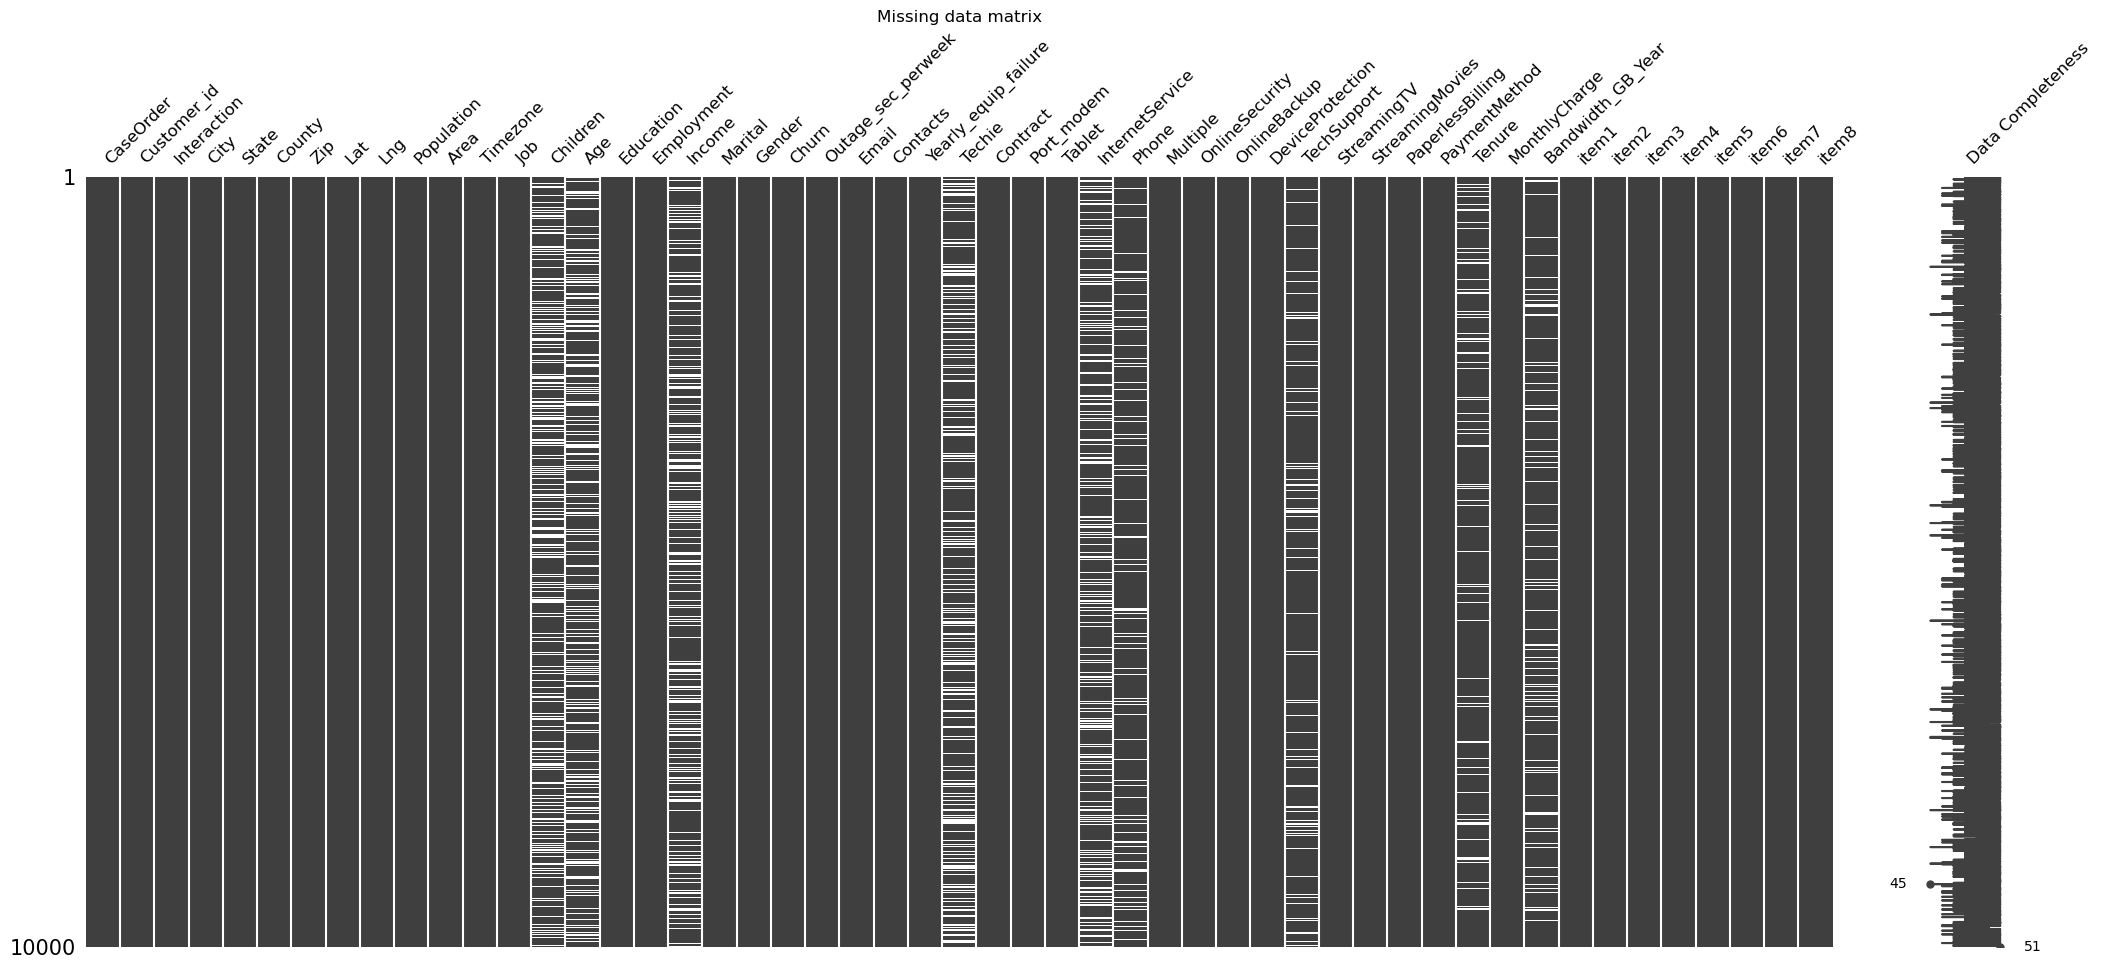

In [8]:
# Run Missing No visual package to view missing data in a matrix
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()

In [9]:
# Look for missing values from the DataFrame (Walker, 2004, p. 25)
df.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [10]:
# Check for any duplicate rows; 10,000 rows present in dataset
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

### Explore each column

### CaseOrder

In [11]:
# Run .nunique() against the column to return the number of unique variables
df['CaseOrder'].nunique()

10000

### Customer_id

In [12]:
# Run .nunique() against the column to return the number of unique variables
df['Customer_id'].nunique()

10000

### Interaction

In [13]:
# Run .nunique() against the column to return the number of unique variables
df['Interaction'].nunique()

10000

### City

In [14]:
# Run .nunique() against the column to return the number of unique variables
df['City'].nunique()

6058

In [15]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['City'].value_counts()

City
Houston         34
New York        24
Springfield     23
Buffalo         23
San Antonio     22
                ..
Cottontown       1
San Dimas        1
Fort Hill        1
Webster          1
Clarkesville     1
Name: count, Length: 6058, dtype: int64

In [16]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['City'].describe()

count       10000
unique       6058
top       Houston
freq           34
Name: City, dtype: object

### State

In [17]:
# Run .nunique() against the column to return the number of unique variables
df['State'].nunique()

52

In [18]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['State'].value_counts()

State
TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
AL    181
NE    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
NM    114
OR    114
AZ    112
ME    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: count, dtype: int64

In [19]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['State'].describe()

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object

### County

In [20]:
# Run .nunique() against the column to return the number of unique variables
df['County'].nunique()

1620

In [21]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['County'].value_counts()

County
Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
              ... 
Rooks            1
Cochise          1
Yauco            1
Hoke             1
Briscoe          1
Name: count, Length: 1620, dtype: int64

In [22]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['County'].describe()

count          10000
unique          1620
top       Washington
freq             111
Name: County, dtype: object

### Zip

In [23]:
# Run .nunique() against the column to return the number of unique variables
df['Zip'].nunique()

8583

In [24]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Zip'].value_counts()

Zip
32340    4
75077    4
44310    4
61764    4
16115    4
        ..
43788    1
58579    1
53526    1
79104    1
30523    1
Name: count, Length: 8583, dtype: int64

In [25]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Zip'].describe()

count    10000.000000
mean     49153.319600
std      27532.196108
min        601.000000
25%      26292.500000
50%      48869.500000
75%      71866.500000
max      99929.000000
Name: Zip, dtype: float64

In [26]:
# There are zip codes below the minimum of 5 digits.
# Check to see how many values have less than 5 digits
(df['Zip'] < 10000).sum()

773

### Lat

In [27]:
# Run .nunique() against the column to return the number of unique variables
df['Lat'].nunique()

8563

### Lng

In [28]:
# Run .nunique() against the column to return the number of unique variables
df['Lng'].nunique()

8655

### Population

In [29]:
# Run .nunique() against the column to return the number of unique variables
df['Population'].nunique()

5933

In [30]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Population'].value_counts()

Population
0        97
94       14
39       12
110      12
227      11
         ..
9295      1
24092     1
10211     1
26177     1
12230     1
Name: count, Length: 5933, dtype: int64

In [31]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

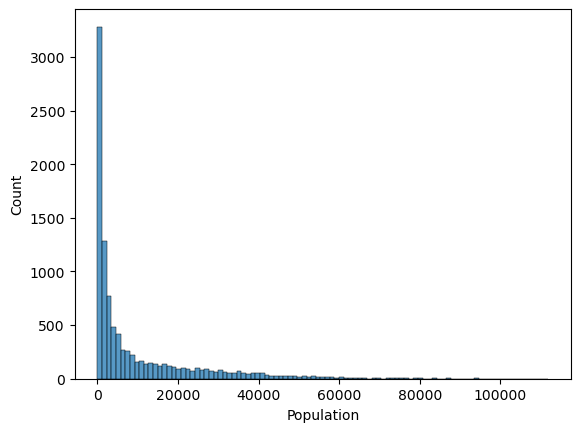

In [32]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Population');

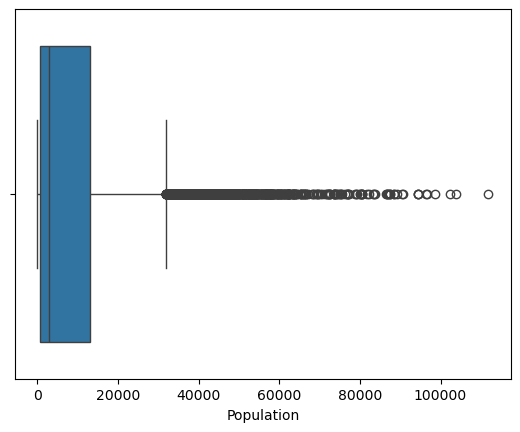

In [33]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Population');

### Area

In [34]:
# Run .nunique() against the column to return the number of unique variables
df['Area'].nunique()

3

In [35]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Area'].value_counts()

Area
Suburban    3346
Urban       3327
Rural       3327
Name: count, dtype: int64

In [36]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Area'].describe()

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

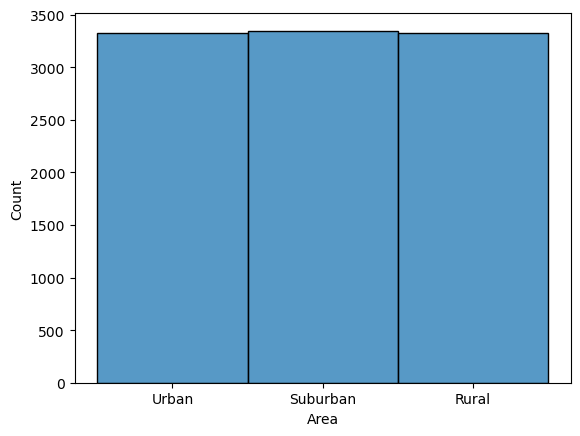

In [37]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Area');

### Timezone

In [38]:
# Run .nunique() against the column to return the number of unique variables
df['Timezone'].nunique()

25

In [39]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Timezone'].value_counts()

Timezone
America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: count, dty

In [40]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Timezone'].describe()

count                10000
unique                  25
top       America/New_York
freq                  4072
Name: Timezone, dtype: object

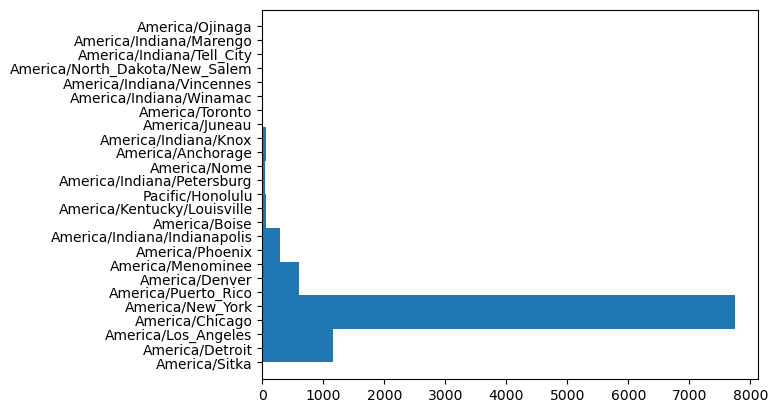

In [41]:
# Create histogram to view a preliminary spread of the data and distribution
plt.hist(data=df, x='Timezone', orientation='horizontal');

### Job

In [42]:
# Run .nunique() against the column to return the number of unique variables
df['Job'].nunique()

639

In [43]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Job'].value_counts()

Job
Occupational psychologist               30
Comptroller                             28
Hospital pharmacist                     28
Horticultural therapist                 28
Ranger/warden                           27
                                        ..
Control and instrumentation engineer     6
Travel agency manager                    6
Accountant, chartered certified          6
Arboriculturist                          6
Toxicologist                             6
Name: count, Length: 639, dtype: int64

In [44]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Job'].describe()

count                         10000
unique                          639
top       Occupational psychologist
freq                             30
Name: Job, dtype: object

### Children

In [45]:
# Check for missing values per .info() results
df['Children'].isnull().sum()

2495

In [46]:
# Run .nunique() against the column to return the number of unique variables
df['Children'].nunique()

11

In [47]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Children'].value_counts()

Children
0.0     1919
1.0     1874
2.0     1100
3.0     1096
4.0      769
5.0      161
8.0      158
7.0      149
6.0      135
10.0      74
9.0       70
Name: count, dtype: int64

In [48]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Children'].describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

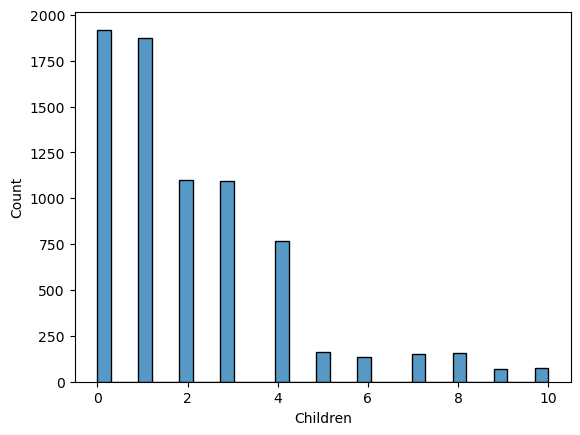

In [49]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Children');

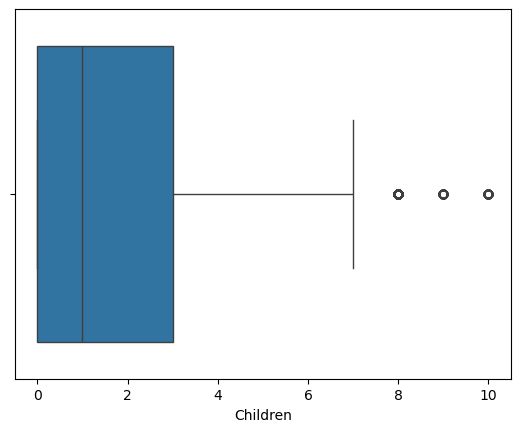

In [50]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Children');

### Age

In [51]:
# Check for missing values per .info() results
df['Age'].isnull().sum()

2475

In [52]:
# Run .nunique() against the column to return the number of unique variables
df['Age'].nunique()

72

In [53]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Age'].value_counts()

Age
55.0    128
41.0    122
77.0    121
80.0    120
57.0    120
       ... 
59.0     92
78.0     92
87.0     92
18.0     90
47.0     87
Name: count, Length: 72, dtype: int64

In [54]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Age'].describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

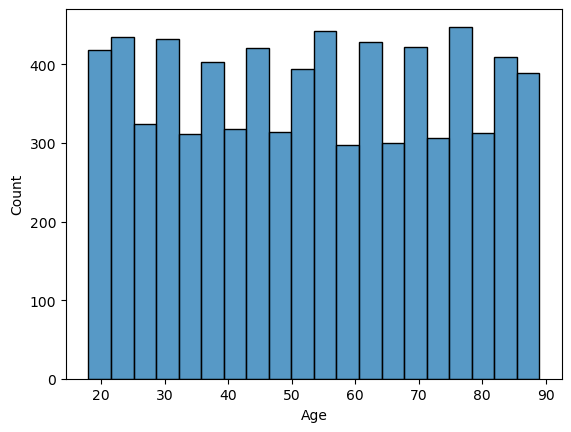

In [55]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Age');

### Education

In [56]:
# Run .nunique() against the column to return the number of unique variables
df['Education'].nunique()

12

In [57]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Education'].value_counts()

Education
Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: count, dtype: int64

In [58]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Education'].describe()

count                           10000
unique                             12
top       Regular High School Diploma
freq                             2421
Name: Education, dtype: object

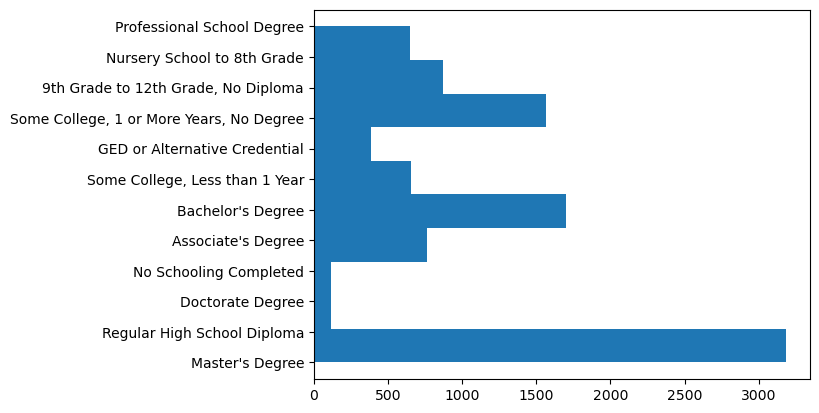

In [59]:
# Create histogram to view a preliminary spread of the data and distribution
plt.hist(data=df, x='Education', orientation='horizontal');

### Employment

In [60]:
# Run .nunique() against the column to return the number of unique variables
df['Employment'].nunique()

5

In [61]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Employment'].value_counts()

Employment
Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: count, dtype: int64

In [62]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Employment'].describe()

count         10000
unique            5
top       Full Time
freq           5992
Name: Employment, dtype: object

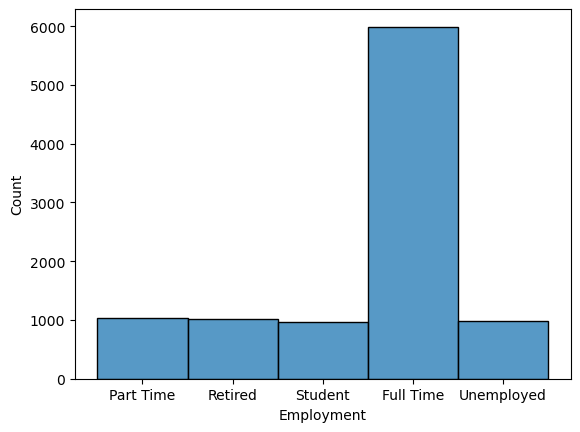

In [63]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Employment');

### Income

In [64]:
# Check for missing values per .info() results
df['Income'].isnull().sum()

2490

In [65]:
# Run .nunique() against the column to return the number of unique variables
df['Income'].nunique()

7506

In [66]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Income'].value_counts()

Income
61325.92    2
36461.20    2
25598.66    2
10530.09    2
28561.99    1
           ..
23947.08    1
25781.26    1
28955.02    1
57295.46    1
16667.58    1
Name: count, Length: 7506, dtype: int64

In [67]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Income'].describe()

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64

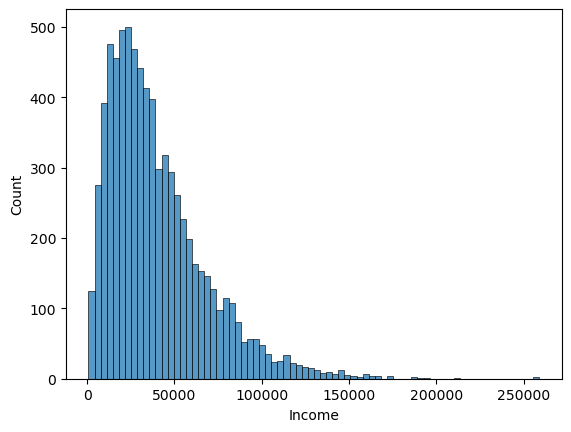

In [68]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Income');

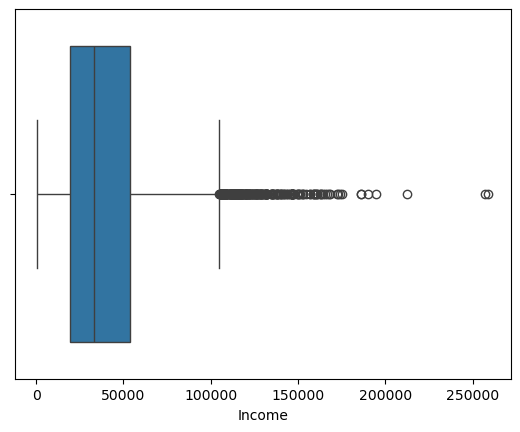

In [69]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Income');

In [70]:
# Check for the 10 largest values to see where the outliers start to
# separate from the rest of the outliers
df['Income'].nlargest(10)

4250    258900.70
9181    256998.40
5802    212255.30
6838    194550.70
3986    189938.40
8831    186156.60
973     186035.04
2763    175137.34
9250    173978.00
657     172884.11
Name: Income, dtype: float64

### Marital

In [71]:
# Run .nunique() against the column to return the number of unique variables
df['Marital'].nunique()

5

In [72]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Marital'].value_counts()

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64

In [73]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Marital'].describe()

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object

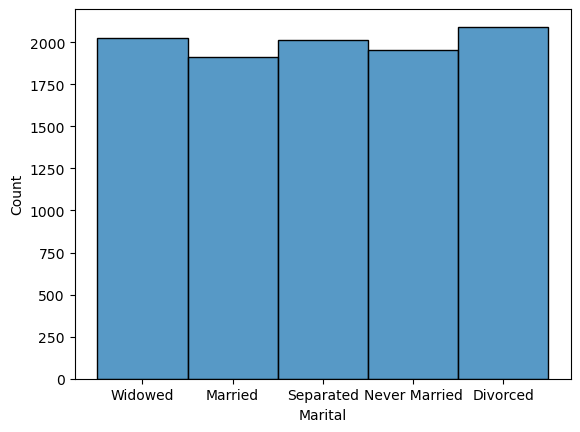

In [74]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Marital');

### Gender

In [75]:
# Run .nunique() against the column to return the number of unique variables
df['Gender'].nunique()

3

In [76]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Gender'].value_counts()

Gender
Female                  5025
Male                    4744
Prefer not to answer     231
Name: count, dtype: int64

In [77]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Gender'].describe()

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

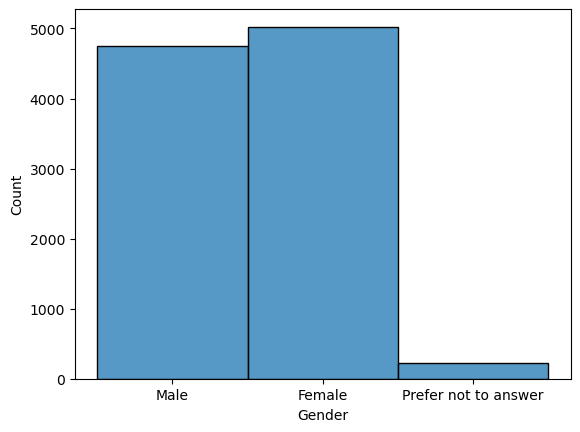

In [78]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Gender');

### Churn

In [79]:
# Run .nunique() against the column to return the number of unique variables
df['Churn'].nunique()

2

In [80]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Churn'].value_counts()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

In [81]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

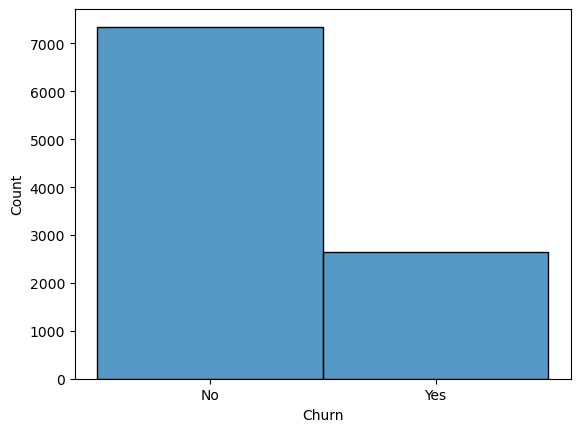

In [82]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Churn');

### Outage_sec_perweek

In [83]:
# Run .nunique() against the column to return the number of unique variables
df['Outage_sec_perweek'].nunique()

9993

In [84]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Outage_sec_perweek'].value_counts()

Outage_sec_perweek
6.242131     2
15.015440    2
12.130800    2
12.107050    2
10.344120    2
            ..
12.972680    1
6.475414     1
18.675760    1
37.595920    1
12.641760    1
Name: count, Length: 9993, dtype: int64

In [85]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

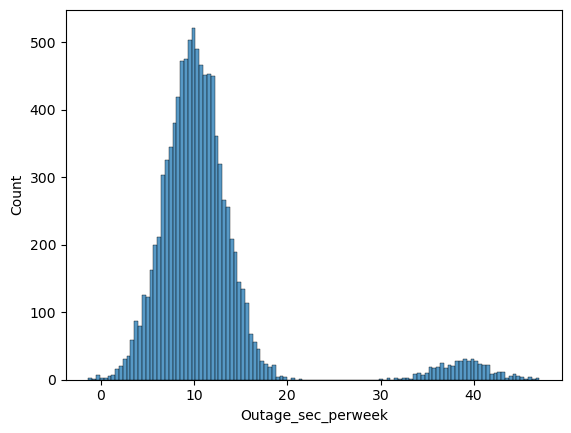

In [86]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Outage_sec_perweek');

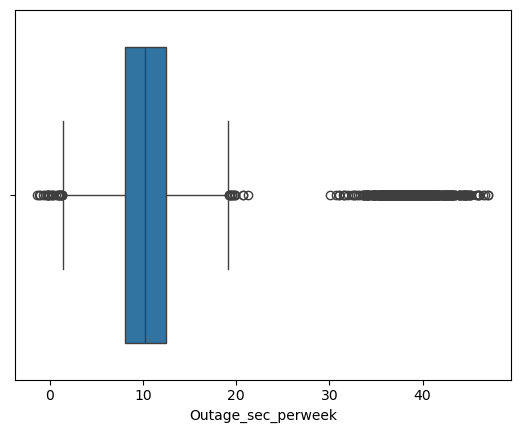

In [87]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Outage_sec_perweek');

In [88]:
(df['Outage_sec_perweek'] < 0).value_counts()

Outage_sec_perweek
False    9989
True       11
Name: count, dtype: int64

In [89]:
(df['Outage_sec_perweek'] > 19).value_counts()

Outage_sec_perweek
False    9486
True      514
Name: count, dtype: int64

### Email

In [90]:
# Run .nunique() against the column to return the number of unique variables
df['Email'].nunique()

23

In [91]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Email'].value_counts()

Email
12    1310
11    1291
13    1268
10    1074
14    1060
15     779
9      774
8      543
16     517
17     351
7      316
18     203
6      185
5      109
19     100
20      51
4       31
3       14
21      12
2        6
1        3
22       2
23       1
Name: count, dtype: int64

In [92]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

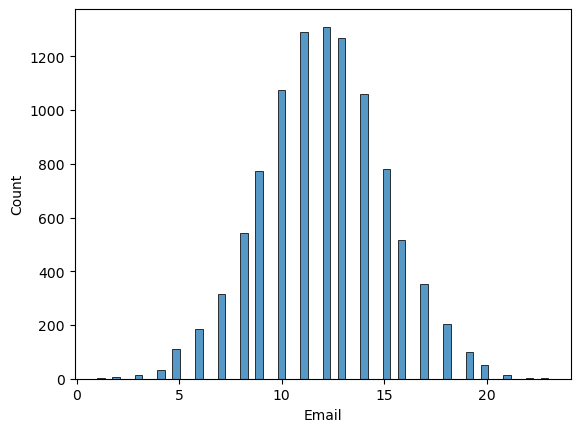

In [93]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Email');

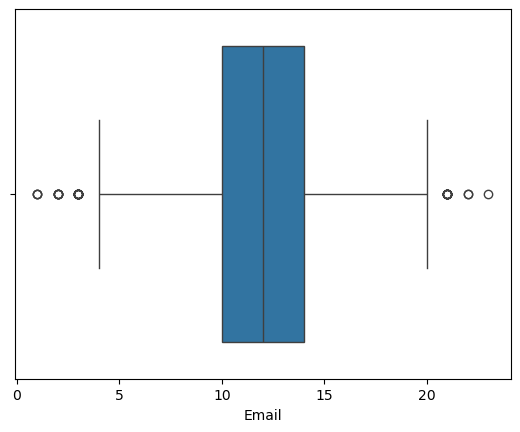

In [94]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Email');

### Contacts

In [95]:
# Run .nunique() against the column to return the number of unique variables
df['Contacts'].nunique()

8

In [96]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Contacts'].value_counts()

Contacts
0    3680
1    3675
2    1872
3     608
4     137
5      20
6       5
7       3
Name: count, dtype: int64

In [97]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

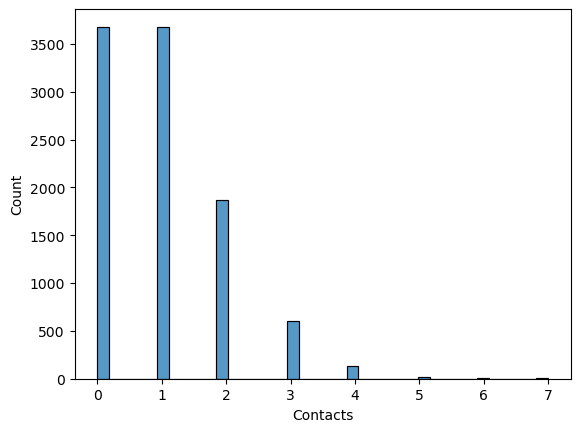

In [98]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Contacts');

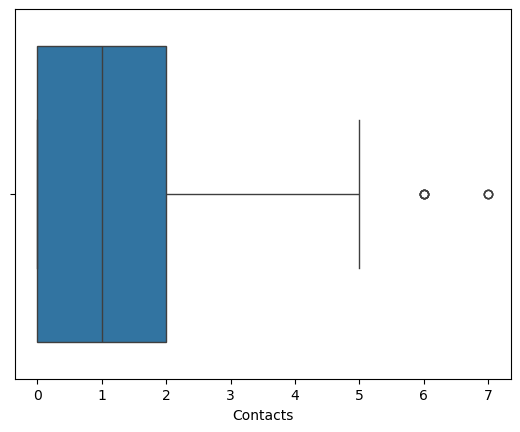

In [99]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Contacts');

### Yearly_equip_failure

In [100]:
# Run .nunique() against the column to return the number of unique variables
df['Yearly_equip_failure'].nunique()

6

In [101]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Yearly_equip_failure'].value_counts()

Yearly_equip_failure
0    6727
1    2670
2     509
3      86
4       7
6       1
Name: count, dtype: int64

In [102]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

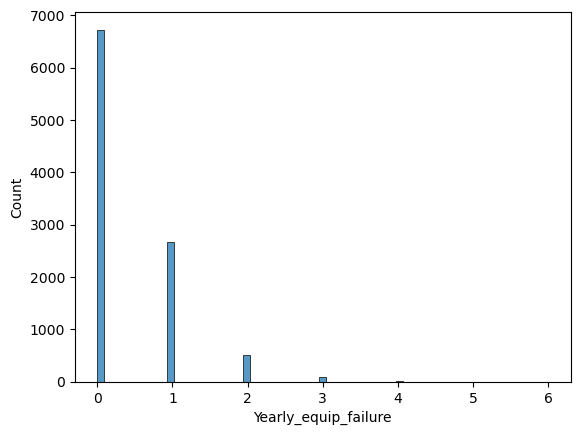

In [103]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Yearly_equip_failure');

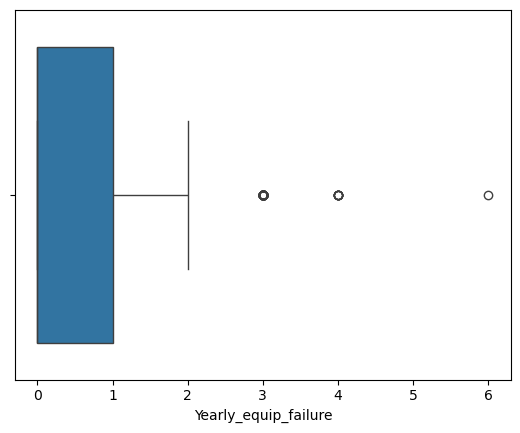

In [104]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Yearly_equip_failure');

### Techie

In [105]:
# Check for missing values per .info() results
df['Techie'].isnull().sum()

2477

In [106]:
# Run .nunique() against the column to return the number of unique variables
df['Techie'].nunique()

2

In [107]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Techie'].value_counts()

Techie
No     6266
Yes    1257
Name: count, dtype: int64

In [108]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Techie'].describe()

count     7523
unique       2
top         No
freq      6266
Name: Techie, dtype: object

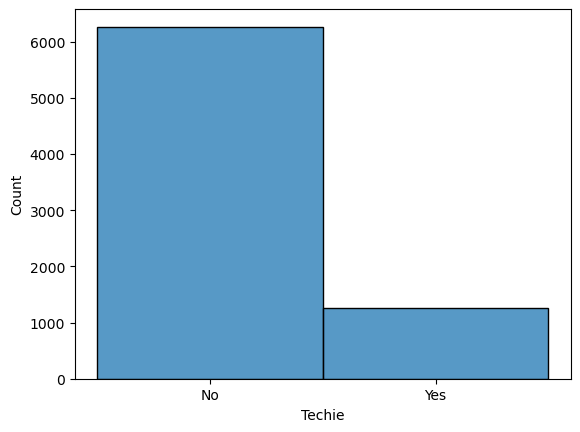

In [109]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Techie');

### Contract

In [110]:
# Run .nunique() against the column to return the number of unique variables
df['Contract'].nunique()

3

In [111]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Contract'].value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

In [112]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

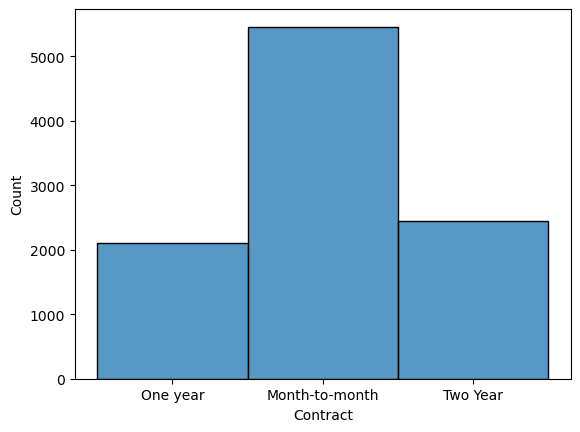

In [113]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Contract');

### Port_modem

In [114]:
# Run .nunique() against the column to return the number of unique variables
df['Port_modem'].nunique()

2

In [115]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Port_modem'].value_counts()

Port_modem
No     5166
Yes    4834
Name: count, dtype: int64

In [116]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Port_modem'].describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

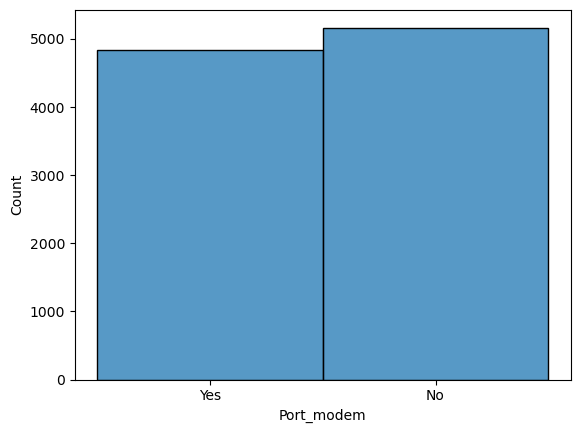

In [117]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Port_modem');

### Tablet

In [118]:
# Run .nunique() against the column to return the number of unique variables
df['Tablet'].nunique()

2

In [119]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Tablet'].value_counts()

Tablet
No     7009
Yes    2991
Name: count, dtype: int64

In [120]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Tablet'].describe()

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object

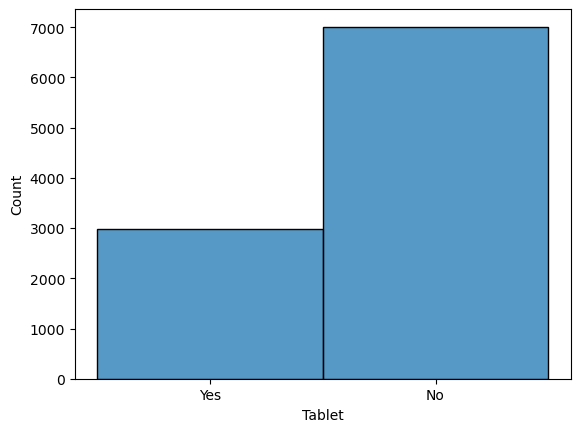

In [121]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Tablet');

### InternetService

In [122]:
# Check for missing values per .info() results
df['InternetService'].isnull().sum()

2129

In [123]:
# Run .nunique() against the column to return the number of unique variables
df['InternetService'].nunique()

2

In [124]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [125]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['InternetService'].describe()

count            7871
unique              2
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

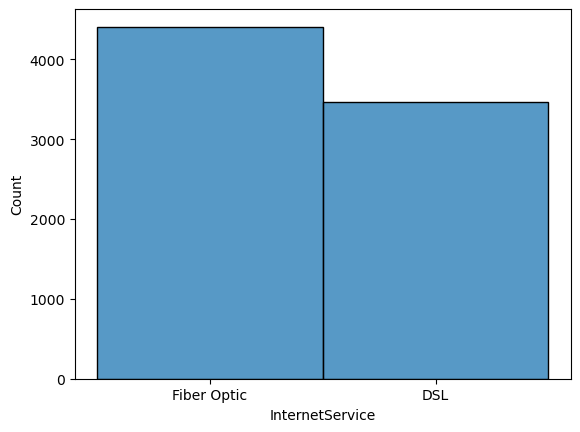

In [126]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='InternetService');

### Phone

In [127]:
# Check for missing values per .info() results
df['Phone'].isnull().sum()

1026

In [128]:
# Run .nunique() against the column to return the number of unique variables
df['Phone'].nunique()

2

In [129]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Phone'].value_counts()

Phone
Yes    8128
No      846
Name: count, dtype: int64

In [130]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Phone'].describe()

count     8974
unique       2
top        Yes
freq      8128
Name: Phone, dtype: object

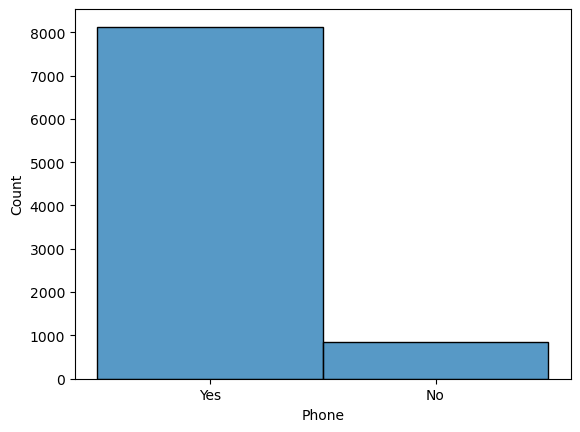

In [131]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Phone');

### Multiple

In [132]:
# Run .nunique() against the column to return the number of unique variables
df['Multiple'].nunique()

2

In [133]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Multiple'].value_counts()

Multiple
No     5392
Yes    4608
Name: count, dtype: int64

In [134]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

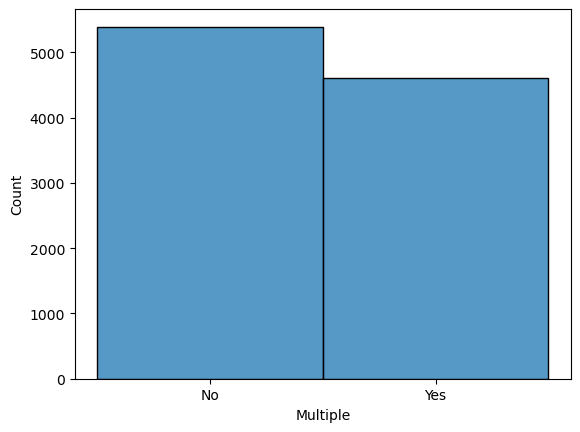

In [135]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Multiple');

### OnlineSecurity

In [136]:
# Run .nunique() against the column to return the number of unique variables
df['OnlineSecurity'].nunique()

2

In [137]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64

In [138]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

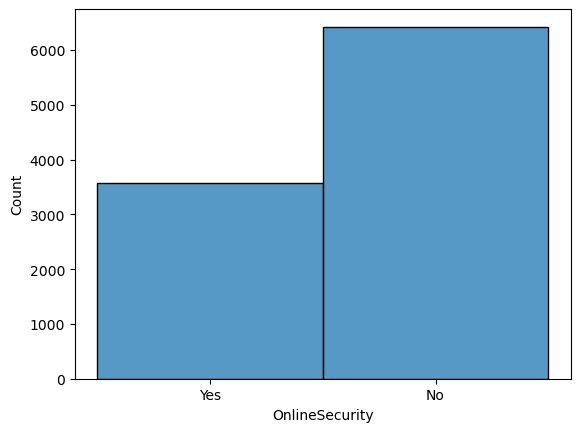

In [139]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='OnlineSecurity');

### OnlineBackup

In [140]:
# Run .nunique() against the column to return the number of unique variables
df['OnlineBackup'].nunique()

2

In [141]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['OnlineBackup'].value_counts()

OnlineBackup
No     5494
Yes    4506
Name: count, dtype: int64

In [142]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['OnlineBackup'].describe()

count     10000
unique        2
top          No
freq       5494
Name: OnlineBackup, dtype: object

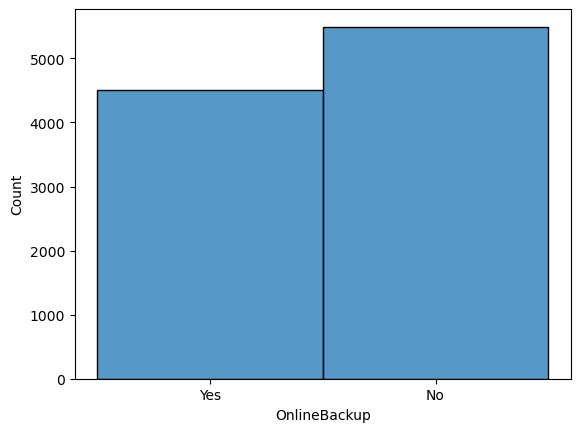

In [143]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='OnlineBackup');

### DeviceProtection

In [144]:
# Run .nunique() against the column to return the number of unique variables
df['DeviceProtection'].nunique()

2

In [145]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['DeviceProtection'].value_counts()

DeviceProtection
No     5614
Yes    4386
Name: count, dtype: int64

In [146]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

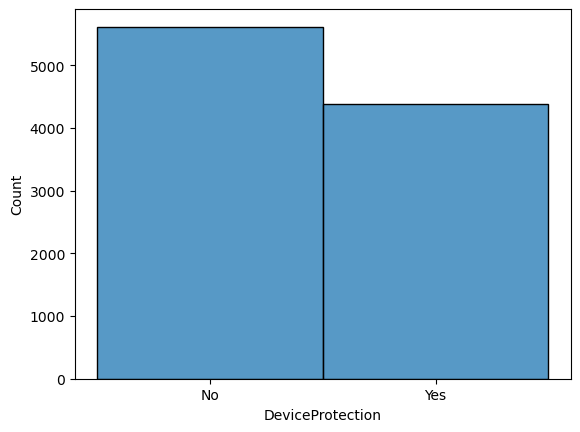

In [147]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='DeviceProtection');

### TechSupport

In [148]:
# Check for missing values per .info() results
df['TechSupport'].isnull().sum()

991

In [149]:
# Run .nunique() against the column to return the number of unique variables
df['TechSupport'].nunique()

2

In [150]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['TechSupport'].value_counts()

TechSupport
No     5635
Yes    3374
Name: count, dtype: int64

In [151]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['TechSupport'].describe()

count     9009
unique       2
top         No
freq      5635
Name: TechSupport, dtype: object

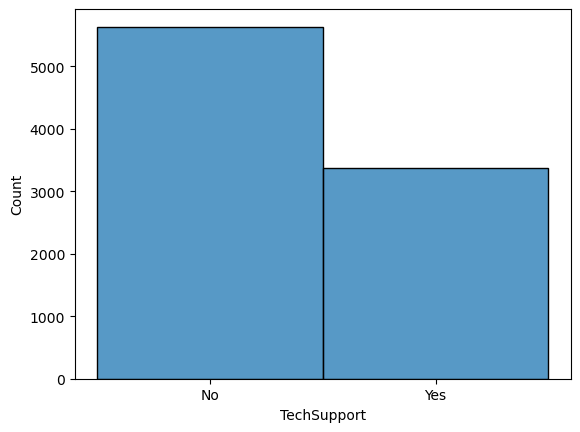

In [152]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='TechSupport');

### StreamingTV

In [153]:
# Run .nunique() against the column to return the number of unique variables
df['StreamingTV'].nunique()

2

In [154]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['StreamingTV'].value_counts()

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64

In [155]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

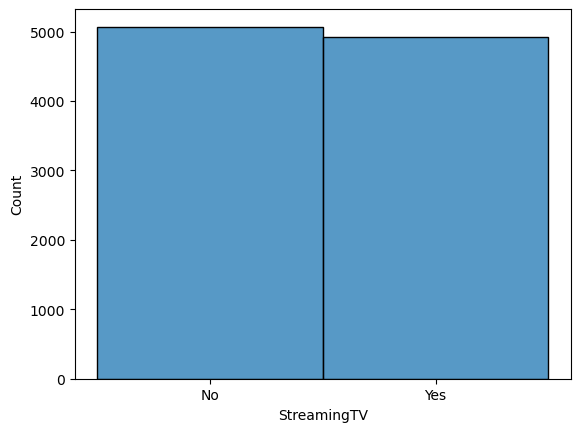

In [156]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='StreamingTV');

### StreamingMovies

In [157]:
# Run .nunique() against the column to return the number of unique variables
df['StreamingMovies'].nunique()

2

In [158]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['StreamingMovies'].value_counts()

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

In [159]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

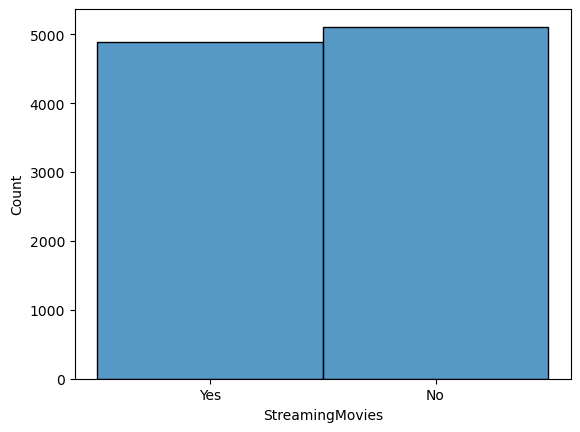

In [160]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='StreamingMovies');

### PaperlessBilling

In [161]:
# Run .nunique() against the column to return the number of unique variables
df['PaperlessBilling'].nunique()

2

In [162]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64

In [163]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['PaperlessBilling'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object

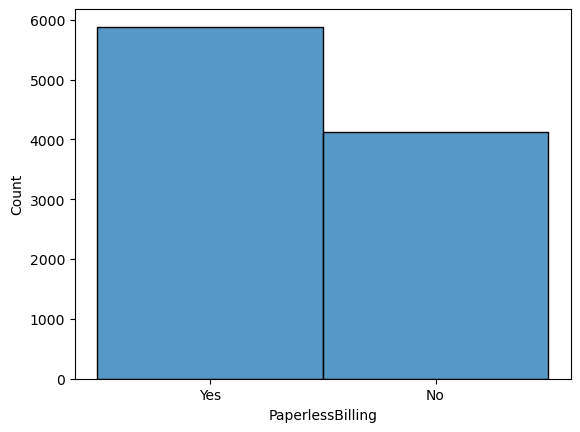

In [164]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='PaperlessBilling');

### PaymentMethod

In [165]:
# Run .nunique() against the column to return the number of unique variables
df['PaymentMethod'].nunique()

4

In [166]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [167]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['PaymentMethod'].describe()

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object

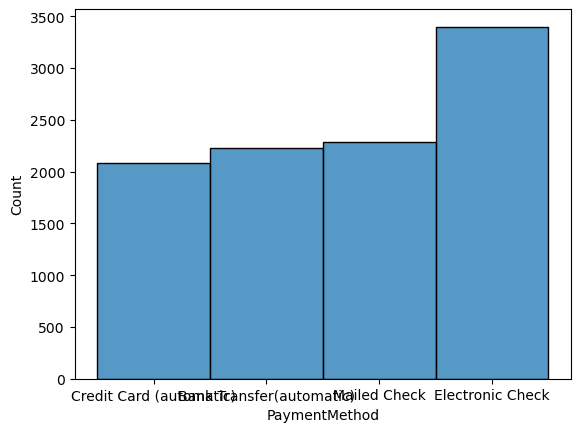

In [168]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='PaymentMethod');

### Tenure

In [169]:
# Check for missing values per .info() results
df['Tenure'].isnull().sum()

931

In [170]:
# Run .nunique() against the column to return the number of unique variables
df['Tenure'].nunique()

9065

In [171]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Tenure'].value_counts()

Tenure
69.504800    2
55.449910    2
62.865710    2
66.668530    2
66.509000    1
            ..
17.411300    1
4.461349     1
7.602068     1
8.442986     1
63.350860    1
Name: count, Length: 9065, dtype: int64

In [172]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Tenure'].describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64

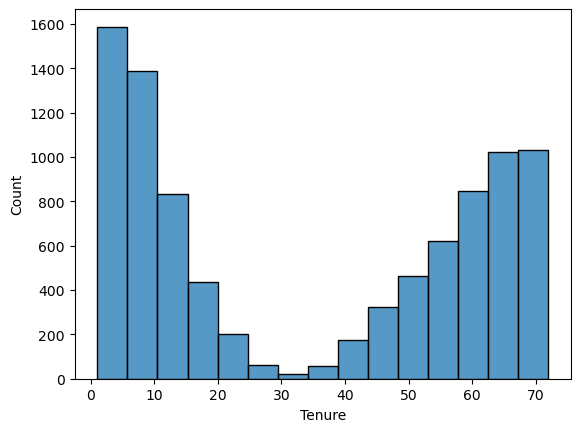

In [173]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Tenure');

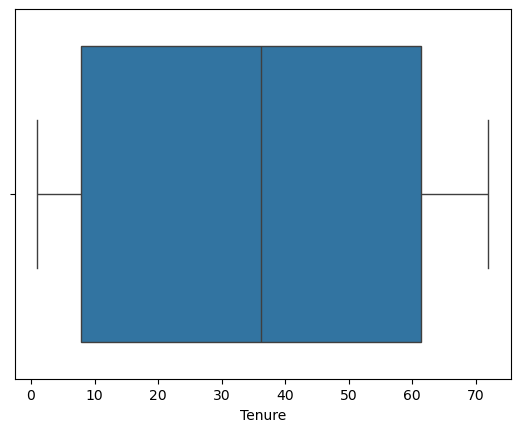

In [174]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Tenure');

### MonthlyCharge

In [175]:
# Run .nunique() against the column to return the number of unique variables
df['MonthlyCharge'].nunique()

9984

In [176]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['MonthlyCharge'].value_counts()

MonthlyCharge
137.4757    3
147.4886    2
115.4933    2
172.9128    2
192.3656    2
           ..
105.9719    1
236.1058    1
150.8860    1
150.3587    1
218.3710    1
Name: count, Length: 9984, dtype: int64

In [177]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['MonthlyCharge'].describe()

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64

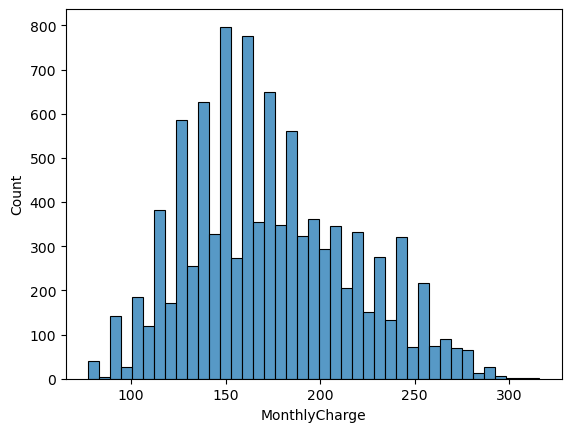

In [178]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='MonthlyCharge');

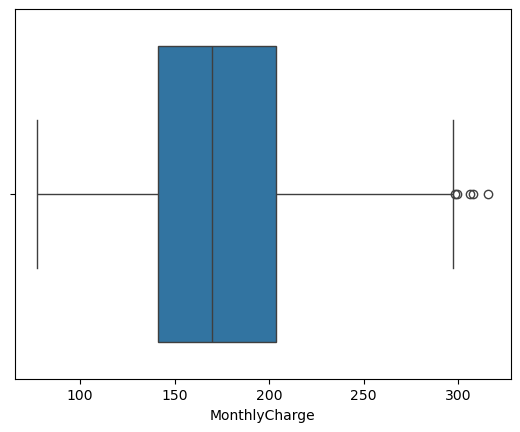

In [179]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='MonthlyCharge');

### Bandwidth_GB_Year

In [180]:
# Check for missing values per .info() results
df['Bandwidth_GB_Year'].isnull().sum()

1021

In [181]:
# Run .nunique() against the column to return the number of unique variables
df['Bandwidth_GB_Year'].nunique()

8972

In [182]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Bandwidth_GB_Year'].value_counts()

Bandwidth_GB_Year
5228.3700    2
5932.6800    2
5626.0940    2
6261.4190    2
6294.8450    2
            ..
1436.9460    1
585.4873     1
686.2609     1
1684.4860    1
5857.5860    1
Name: count, Length: 8972, dtype: int64

In [183]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Bandwidth_GB_Year'].describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64

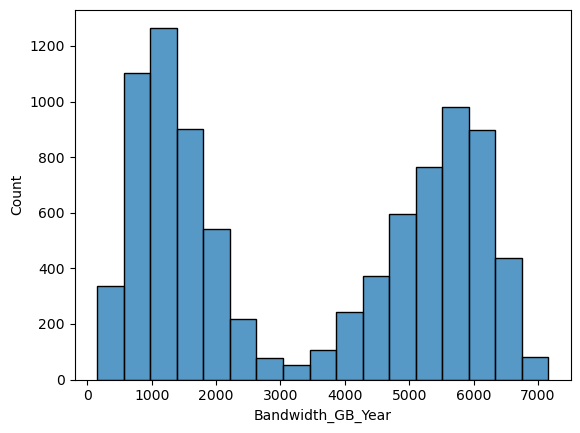

In [184]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Bandwidth_GB_Year');

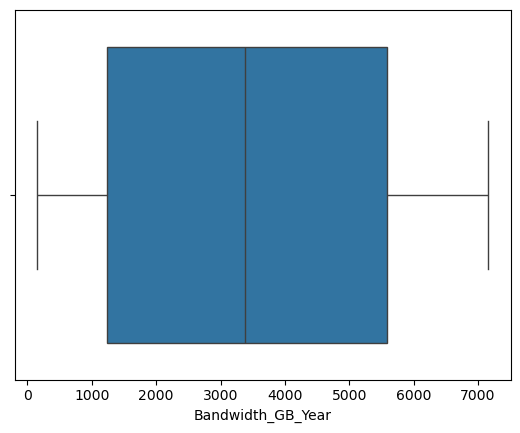

In [185]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Bandwidth_GB_Year');

### item1

In [186]:
# Run .nunique() against the column to return the number of unique variables
df['item1'].nunique()

7

In [187]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item1'].value_counts()

item1
3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: count, dtype: int64

In [188]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item1'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item1, dtype: float64

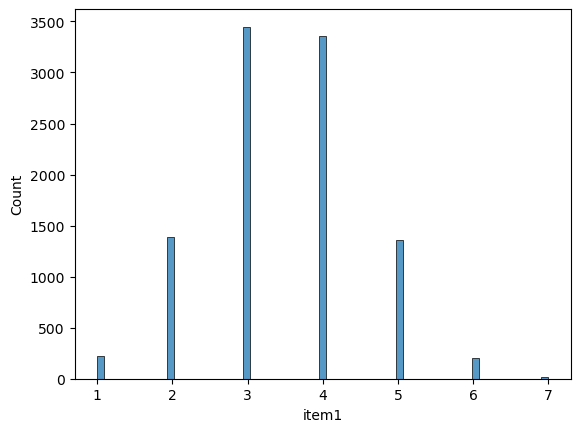

In [189]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item1');

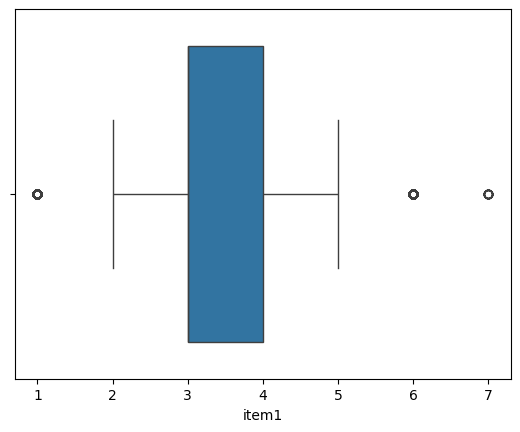

In [190]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item1');

### item2

In [191]:
# Run .nunique() against the column to return the number of unique variables
df['item2'].nunique()

7

In [192]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item2'].value_counts()

item2
3    3415
4    3412
5    1368
2    1360
1     217
6     215
7      13
Name: count, dtype: int64

In [193]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item2'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item2, dtype: float64

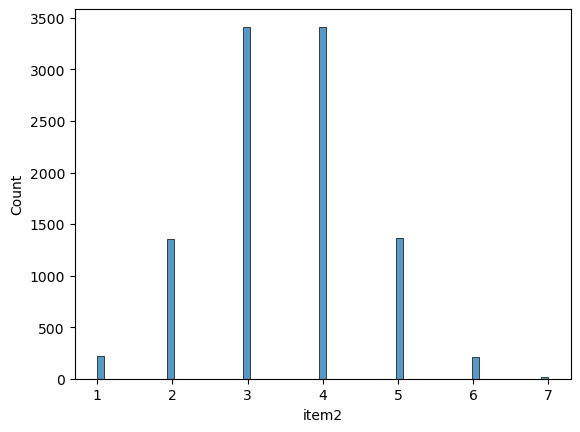

In [194]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item2');

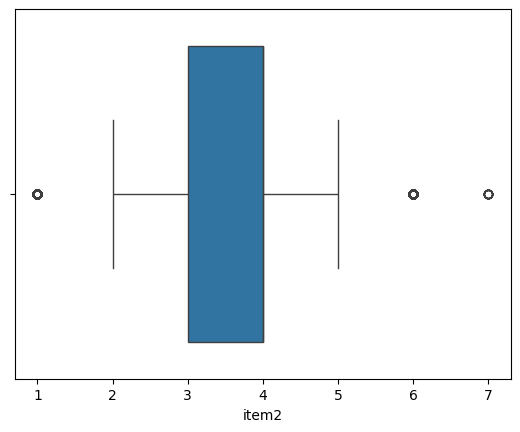

In [195]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item2');

### item3


In [196]:
# Run .nunique() against the column to return the number of unique variables
df['item3'].nunique()

8

In [197]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item3'].value_counts()

item3
3    3435
4    3410
2    1424
5    1313
6     203
1     202
7      12
8       1
Name: count, dtype: int64

In [198]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item3'].describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item3, dtype: float64

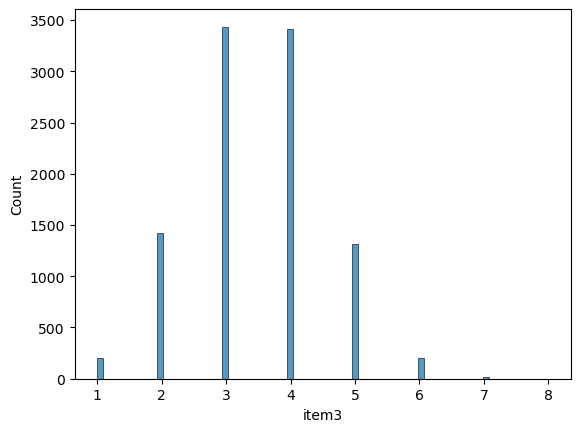

In [199]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item3');

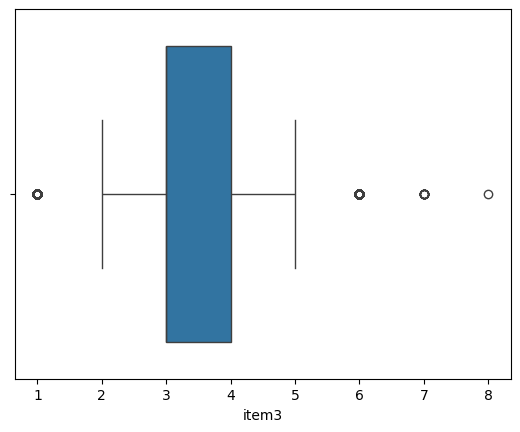

In [200]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item3');

### item4

In [201]:
# Run .nunique() against the column to return the number of unique variables
df['item4'].nunique()

7

In [202]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item4'].value_counts()

item4
4    3452
3    3430
2    1350
5    1335
1     221
6     203
7       9
Name: count, dtype: int64

In [203]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item4'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item4, dtype: float64

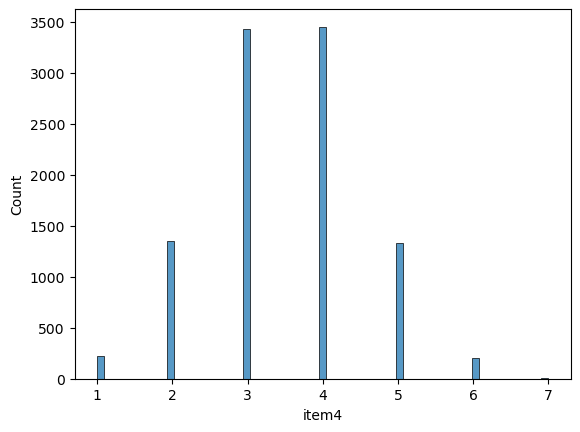

In [204]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item4');

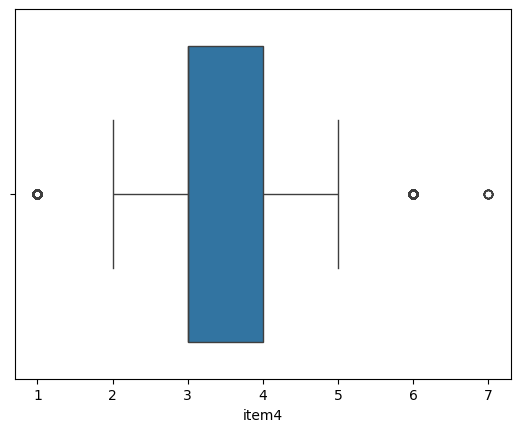

In [205]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item4');

### item5

In [206]:
# Run .nunique() against the column to return the number of unique variables
df['item5'].nunique()

7

In [207]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item5'].value_counts()

item5
3    3462
4    3417
2    1378
5    1321
1     206
6     204
7      12
Name: count, dtype: int64

In [208]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item5'].describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item5, dtype: float64

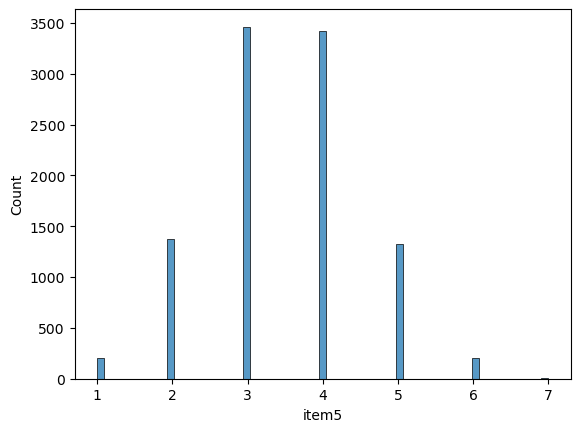

In [209]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item5');

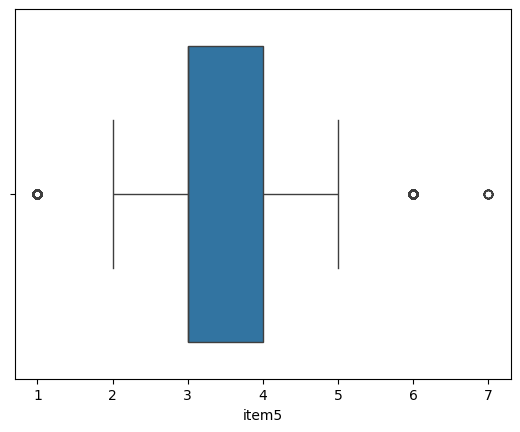

In [210]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item5');

### item6

In [211]:
# Run .nunique() against the column to return the number of unique variables
df['item6'].nunique()

8

In [212]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item6'].value_counts()

item6
3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: count, dtype: int64

In [213]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item6'].describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item6, dtype: float64

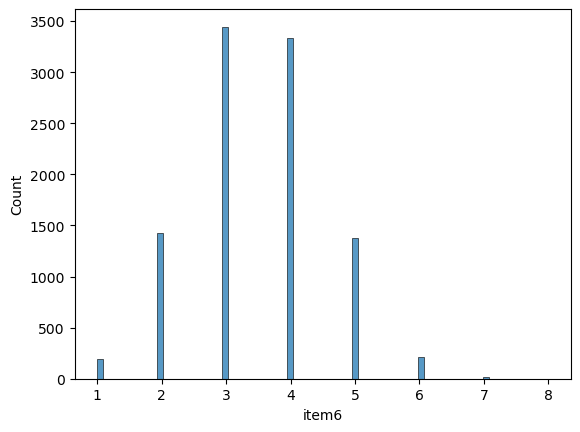

In [214]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item6');

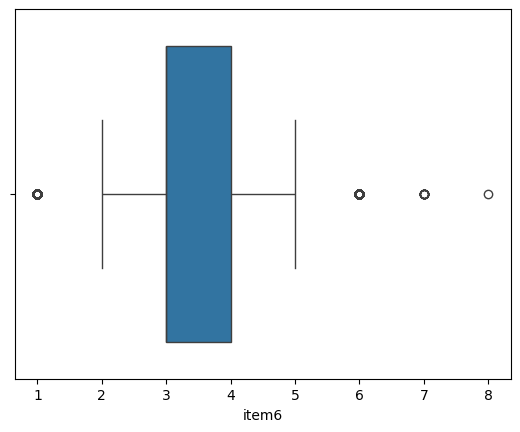

In [215]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item6');

### item7

In [216]:
# Run .nunique() against the column to return the number of unique variables
df['item7'].nunique()

7

In [217]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item7'].value_counts()

item7
4    3456
3    3446
5    1335
2    1309
6     224
1     219
7      11
Name: count, dtype: int64

In [218]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item7'].describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item7, dtype: float64

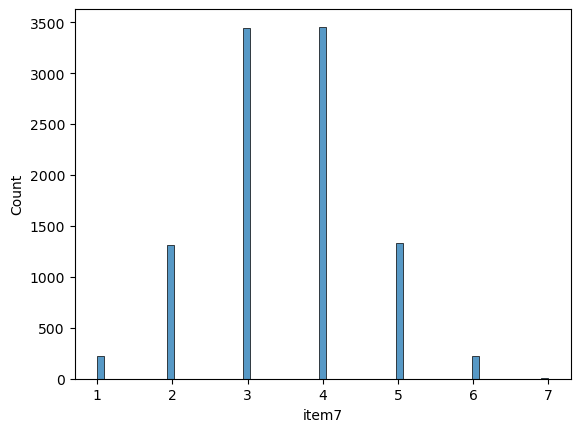

In [219]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item7');

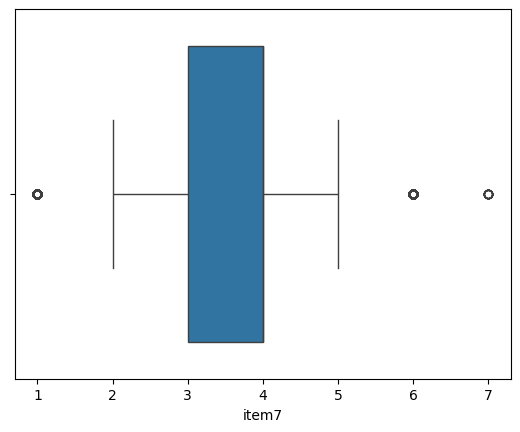

In [220]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item7');

### item8

In [221]:
# Run .nunique() against the column to return the number of unique variables
df['item8'].nunique()

8

In [222]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item8'].value_counts()

item8
3    3461
4    3400
2    1378
5    1335
1     206
6     205
7      14
8       1
Name: count, dtype: int64

In [223]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item8'].describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item8, dtype: float64

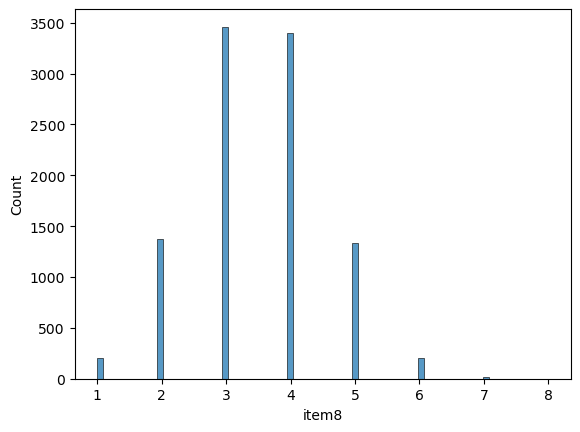

In [224]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item8');

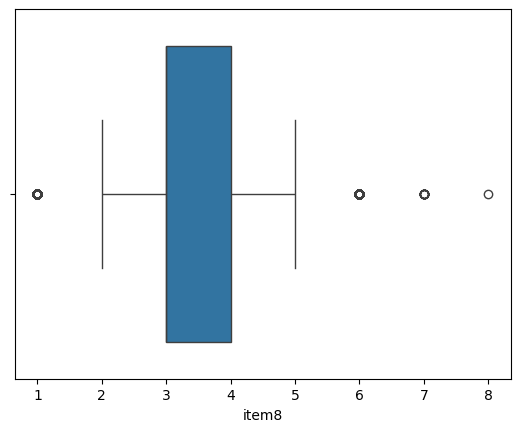

In [225]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item8');

## D1. Cleaning Findings

**General Issues**

- 52 `State` values were found. This dataset includes Washington D.C. (DC) and Puerto Rico (PR).
- `Zip` has 773 values with zip codes featuring only 3 or 4 digits. This is possible in East Code zip codes, but the preceding 0s must be retained as significant values.
- Column names do not match a consistent naming convention.
- There are too many time zones to represent the United States appropriately.

**Duplicates**

- No duplicate rows were found. All 10,000 rows are unique and should be retained.

**Missing Values**

- `Children`, `Age`, `Income`, `Techie`, `InternetService`, `Phone`, `TechSupport`, `Tenure`, and `Bandwidth_GB_Year` all have missing values. Treatment of these will depend on their distribution.

**Outliers**

- It is worth remembering that `Population` is not of the city of residence but within a 1-mile square radius. These outliers feel particularly high for that. However, the city with the highest frequency in the dataset is Houston, which has a population of over 2.3 million. According to a Google search for the highest population densities per square mile in the United States (which is still more land coverage than a 1-mile radius), approximately 63,000 people per square mile is the highest population density in the U.S. I have questions as to whether all the data is reported correctly. This will be explored further in D2.
- `Children` treats any number above 7 as an outlier but these are not outside the logical bounds and can remain as is.
- `Income` features many outliers, but these do not seem outside of logical bounds as income distribution in the United States is vast. Plus, the largest number of customers come from major cities where higher incomes are typically found. However, 7 very high outliers change the distribution drastically.
- `Outage_sec_perweek` count any data point greater than 19 as outliers. There are 514 values above 19, so extreme outages may have occurred. These are not illogical, though, so the outliers can remain untreated. Eleven values are recorded as less than 0; this is not possible as this data represents the absence of service. These values will need to be treated with the `abs()` function to remove their sign and make all the values positive.
- `Email`, `Contacts`, `Yearly_equip_failure`, `MonthlyCharge`and each of the survey questions feature outliers. All of the outliers are within logical or expected bounds.

**Change Data Type**

- `Zip`, `Lat`, and `Lng` should be recast as string/objects to retain precision as geographical identifiers.
- `Children` should be recast from a Float to an Integer type as it's a discrete numerical value.
- The following variables should be recast as nominal categories: `Area`, `Timezone`, `Job`, `Employment`, `Marital`, `Gender`, `Contract`, `InternetService`, `PaymentMethod`, and `Education`.
- The following variables should be recast as ordinal categories: `item1`, `item2`, `item3`, `item4`, `item5`, `item6`, `item7`, `item8`.
- The following variables should be re-cast as Booleans: `Churn`, `Techie`, `Port_modem`, `Tablet`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`.

## D2. Justification of Mitigation Methods

**General Issues**

- The names of the column headers should follow a consistent format (and some could have their meaning clarified). I replace them with a snake_case format.
- The columns associated with the survey questions will be renamed to clarify what the question is measuring.
- I use a Pandas Series method called `zfill()` to add preceding `0`s to the ZIP codes that have less than 5 digits. It is common on the East Coast for ZIP codes to start with 0 and there are 773 instances in the dataset. Due to the nature of CSVs, any data type cast as an integer will drop leading 0s, not recognizing them as statistically significant.
- The `Timezone`s overlap by having too much detail of subcategories. I simplify this structure by merging the subcategories so that only the high-level categories persist. For instance, “America/Toronot” and “America/New York” represent the same time zone. I will change that to “US/Eastern”.
- The `Outage_sec_perweek` column contains erroneous negative values that must be corrected. I use the `abs()` function to flip the numbers of the values below 0 from negative to positive. This does not change the distribution of data.

**Duplicates**

- There are no duplicate records in this dataset. No treatment is needed as all 10,000 rows are unique.

**Missing Values**

- `Children`, `Age`, `Income`, `Techie`, `InternetService`, `Phone`, `TechSupport`, `Tenure`, and `Bandwidth_GB_Year` all have missing values.
    - `Children` is missing 2495 values, approximately 25% of the data. The column will be imputed with `0`. This is a self-reported value by customers, and if they choose not to report it, the safest answer is `0`. This is also the statistically relevant solution because `0` represents the median and mode of the existing data.
    - `Age` is missing 2475 values, approximately 25% of the data. This value is self-reported by the customer. If this is necessary information, it should become required information in any sign-up forms. The column has a fairly uniform distribution, so a rounded mean (integer) would be best to impute for the missing values. It will cause a spike in the center due to the number of missing values but will not change the overall distribution.
    - `Income` is missing 2490 values, approximately 25% of the data. This value is self-reported by the customer. If this is necessary information, it should become required information in any sign-up forms. Based on the right skew of the data, imputing the median would likely create the most representative data. With so many data points missing, it will cause a spike, but the distribution will remain steady.
    - `Techie` is missing 2477 values, approximately 25% of the data. When dealing with Boolean values, it's safer to impute `"No"` or `0` than to assume the affirmative.
    - `InternetService` is missing 2129 values, approximately 22% of the data. I fill this in with `"None"` as it's possible that a customer might not have internet service but may have other services with the company."
    - `Phone` is missing 1026 values, approximately 10% of the data. When dealing with Boolean values, it's safer to impute `"No"` or `0` than to assume the affirmative.
    - `TechSupport` is missing 991 values, approximately 10% of the data. When dealing with Boolean values, it's safer to impute `"No"` or `0` than to assume the affirmative.
    - `Tenure` is missing 931 values, approximately 9% of the data. As this is an internal calculation, the process for creating/inputting this data should be reviewed. The distribution is bimodal, so I fill the missing values with the mode.
    - `Bandwidth_GB_Year` is missing 1021 values, approximately 10% of the data. As this is an internal calculation, the process for creating/inputting this data should be reviewed. The distribution is bimodal, so I fill the missing values with the mode.

**Outliers**

- It is worth remembering that this `Population` is not of the city of residence but within a 1-mile square radius. These outliers feel particularly high for that. However, the city with the highest frequency in the dataset is Houston, which has a population of over 2.3 million. According to a Google search for the highest population densities per square mile in the United States (which is still more land coverage than a 1-mile radius), approximately 63,000 people per square mile is the highest population density in the U.S. I have questions as to whether all the data is reported correctly. Still, perhaps it's worth creating a 90th percentile ceiling and imputing that data for any values currently above the 90th percentile.
- While high, the outliers in the `Children` column are not outside of logical bounds and can remain untreated.
- `Income` has many outliers, but these do not seem outside of logical bounds as income distribution in the United States is vast. Plus, the largest number of customers come from major cities where higher incomes are typically found. However, 7 very high outliers change the distribution drastically.
- `Outage_sec_perweek` count any data point greater than 19 as outliers. There are 514 values above 19, so extreme outages may have occurred. These are not illogical, though, so the outliers can remain untreated. Eleven values are recorded as less than 0; this is not possible as this data represents the absence of service. These values must be treated with the `abs()` function to remove their sign and make all the values positive.
- `Email`, `Contacts`, `Yearly_equip_failure`, `MonthlyCharge`, and each of the survey questions feature outliers. All of the outliers are within logical or expected bounds. For that reason, these outliers will not be treated and are left as is.

**Change Data Types**

- I change the data types of the `Zip`, `Lat`, and `Lng` columns from integer/float to string to ensure precision and data integrity as these are qualitative pieces of information that happen to take numeric values. We are not interested in finding summary statistics on these values and they express geographic locations.
- I change the data type of `Children` from `float64` to `int64` as all the values should be integers. The existing values all have a `.0` value so there is no distribution change in the data.
- I change `Area`, `Timezone`, `Job`, `Education`, `Employment`, `Marital`, `Gender`, `InternetService`, `Contract`, and `PaymentMethod` to nominal variables. These are categories that feature a low number of unique values and lack scale/order/rank in the values.
- I change `Churn`, `Techie`, `Port_modem`, `Tablet`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, and `PaperlessBilling` to the Boolean type based on the presence of only two variables, representing "Yes" and "No". Zero (`0`) will be used for "No," and one (`1`) will be used for "Yes".
- I change `item1`, `item2`, `item3`, `item4`, `item5`, `item6`, `item7`, and `item8` to ordinal categorical variables based on the low number of unique values and the necessity of scale/order/rank in the values.

## D3. Summary of the Outcomes

The first thing I did was change the names of the column headers to follow Pythonic conventions. This makes it easier to read and understand what the columns represent.

Next, I collapsed the time zone categories into the standard time zones across the United States. This removed an unnecessary level of precision and duplicate values. While these are not “duplicates” in the sense we’re talking about, “America/Indiana/Knox” and “America/Chicago” represent the same time zone.

I treated the negative values found in the `outage_sec_per_week` column as only positive values should be found to record the absence of service. This changed the minimum value without changing any of the measures of center.

`children`, `age`, `income`, `internet_service`, `techie`, `phone_service` , `tech_support`, `tenure`, and `bandwidth_gb_year` all had values imputed to fill the missing values. This brought their count of records up to 10,000, along with the rest of the columns. For some, a mean, median, or mode was imputed. For others, a “No” or “None” value was added depending on the context. This ensured there was no missing data and that the data added supported the existing data distributions.

The only column with extreme outliers that didn’t make logical sense was the `population` column, as there was such a large jump from the 75th percentile (13,168) to the max value (111,850). I capped the maximum off at the 90th percentile and imputed that value for any outlier above that. That ensured there remained values for those points.

Lastly, I changed several columns’ data types to reflect their purpose better. This helps ensure consistency in adding new data and analyzing existing data. It helped to retain the precision of data being lost to generic data types in CSV format and should retain the necessary level of precision going forward.

## D4. Data Cleaning (Treatment)

### General Issues

In [226]:
# Replace the column names with Pythonic names
# * Create a dictionary featuring the existing column names as keys
# * with the names to replace them as values.
column_headers = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area_type',
    'Timezone': 'time_zone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Education': 'education',
    'Employment': 'employment',
    'Income': 'income',
    'Marital': 'marital',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_per_week',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equipment_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'portable_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone_service', # 'Phone' could be mistaken for 'phone_number'
    'Multiple': 'multiple_services',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'item1': 'timely_response',
    'item2': 'timely_fixes',
    'item3': 'timely_replacements',
    'item4': 'reliability',
    'item5': 'service_options',
    'item6': 'respectful_response',
    'item7': 'courteous_exchange',
    'item8': 'active_listening',
}

# Use .rename() method to replace the existing column headers with the column_headers dictionary
# (M. Walker, 2024, p. 24)
df.rename(columns=column_headers, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   city                      10000 non-null  object 
 4   state                     10000 non-null  object 
 5   county                    10000 non-null  object 
 6   zip                       10000 non-null  int64  
 7   lat                       10000 non-null  float64
 8   lng                       10000 non-null  float64
 9   population                10000 non-null  int64  
 10  area_type                 10000 non-null  object 
 11  time_zone                 10000 non-null  object 
 12  job                       10000 non-null  object 
 13  children                  7505 non-null   float64
 14  age        

### Collapse time zone categories

In [227]:
# Check for existing unique values in `time_zone`
df['time_zone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [228]:
# Create a dictionary of existing time zones with more simplified standard US timezones
# * currently specific to Daylight time unless otherwise specified
# (timeanddate.com, 2024)
# Use .replace() method to replace existing values (keys) with desired values (values)
df['time_zone'] = df['time_zone'].replace({
    'America/Sitka': 'US/Alaska', 
    'America/Detroit': 'US/Eastern', 
    'America/Los_Angeles': 'US/Pacific',
    'America/Chicago': 'US/Central', 
    'America/New_York': 'US/Eastern', 
    # Puerto Rico observes Atlantic Standard Time year-round
    'America/Puerto_Rico': 'US/Atlantic',
    'America/Denver': 'US/Mountain', 
    'America/Menominee': 'US/Central', 
    # Phoenix observes Mountain Standard Time year-round
    'America/Phoenix': 'US/Mountain',
    'America/Indiana/Indianapolis': 'US/Eastern', 
    'America/Boise': 'US/Mountain',
    'America/Kentucky/Louisville': 'US/Eastern', 
    'Pacific/Honolulu': 'US/Hawaii',
    'America/Indiana/Petersburg': 'US/Eastern', 
    'America/Nome': 'US/Atlantic', 
    'America/Anchorage': 'US/Alaska',
    'America/Indiana/Knox': 'US/Central', 
    'America/Juneau': 'US/Alaska', 
    'America/Toronto': 'US/Eastern',
    'America/Indiana/Winamac': 'US/Eastern', 
    'America/Indiana/Vincennes': 'US/Eastern',
    'America/North_Dakota/New_Salem': 'US/Central', 
    'America/Indiana/Tell_City': 'US/Central',
    'America/Indiana/Marengo': 'US/Eastern', 
    'America/Ojinaga': 'US/Central'})

In [229]:
# Check for existing unique values in `time_zone`
df['time_zone'].unique()

array(['US/Alaska', 'US/Eastern', 'US/Pacific', 'US/Central',
       'US/Atlantic', 'US/Mountain', 'US/Hawaii'], dtype=object)

In [230]:
df['time_zone'].value_counts()

time_zone
US/Eastern     4550
US/Central     3698
US/Pacific      887
US/Mountain     713
US/Alaska        65
US/Atlantic      52
US/Hawaii        35
Name: count, dtype: int64

### Treat Erroneous Values

In [231]:
# View summary statistics on column
df['outage_sec_per_week'].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: outage_sec_per_week, dtype: float64

In [232]:
# Check for number of values below 0
(df['outage_sec_per_week'] < 0).sum()

11

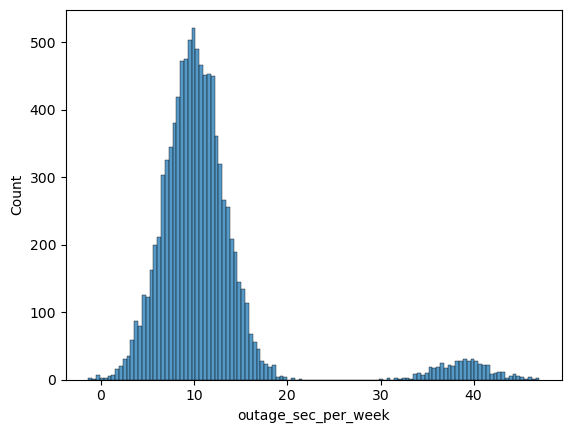

In [233]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='outage_sec_per_week');

In [234]:
df['outage_sec_per_week'] = df['outage_sec_per_week'].abs()
df['outage_sec_per_week'].describe()

count    10000.000000
mean        11.454229
std          7.023844
min          0.113821
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: outage_sec_per_week, dtype: float64

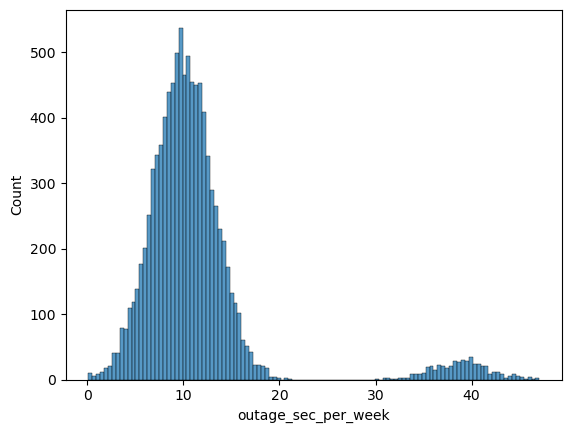

In [235]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='outage_sec_per_week');

### Treat Missing Values

In [236]:
# Variable: children
df['children'].describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: children, dtype: float64

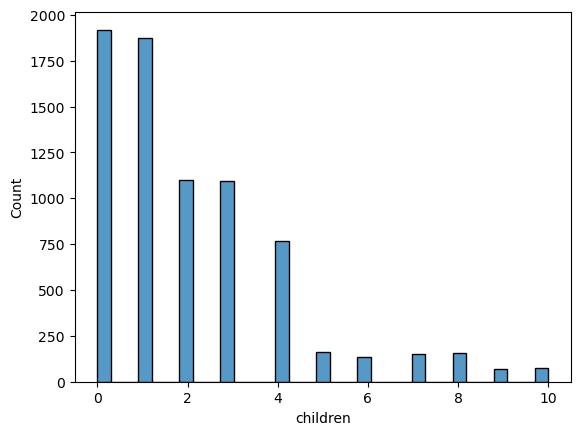

In [237]:
# Check the original distribution
sns.histplot(data=df, x='children');

In [238]:
# Get central values for children
print(df['children'].median())
print(df['children'].mean())
print(df['children'].mode())

# Fill null values with 0 due to failure of customer to report input
df['children'] = df['children'].fillna(0)

1.0
2.095936042638241
0    0.0
Name: children, dtype: float64


In [239]:
# Check for number of null values
df['children'].isnull().sum()

0

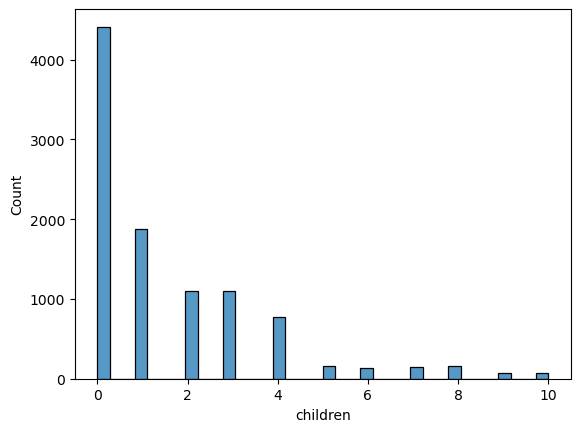

In [240]:
# Check the new distribution
sns.histplot(data=df, x='children');

---

In [241]:
# Variable: age
df['age'].describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: age, dtype: float64

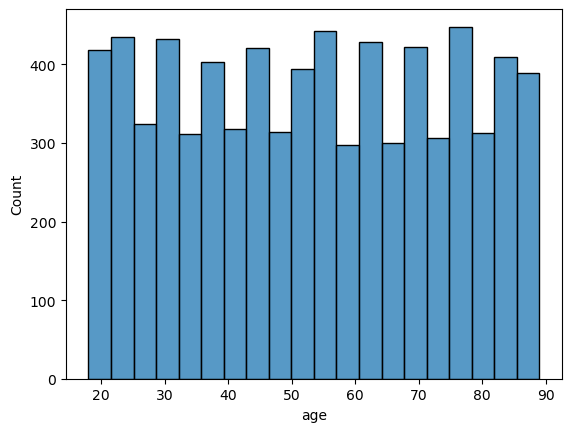

In [242]:
# Re-check the original distribution
sns.histplot(data=df, x='age');

In [243]:
# Fill null values with mean due to normal distribution
age_mean = round(df['age'].mean())
df['age'] = df['age'].fillna(age_mean)

In [244]:
# Check for number of null values
df['age'].isnull().sum()

0

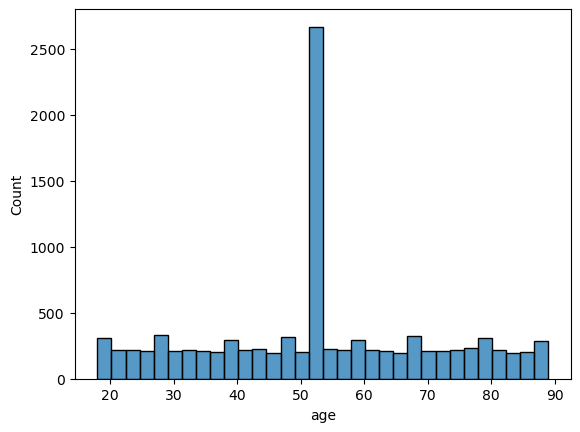

In [245]:
# Check the new distribution
sns.histplot(data=df, x='age');

---

In [246]:
# Variable: income
df['income'].describe()

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: income, dtype: float64

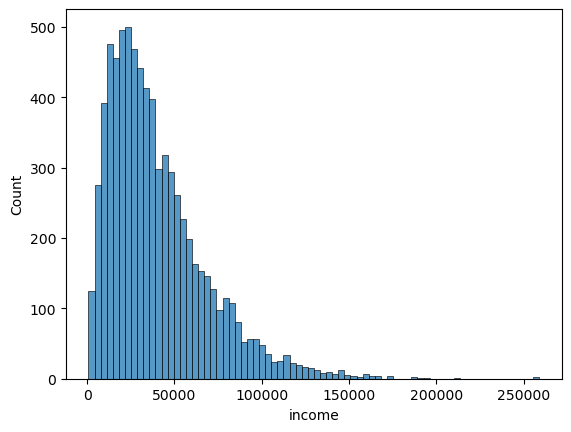

In [247]:
# Check the original distribution
sns.histplot(data=df, x='income');

In [248]:
# Replace null values with the new median
df['income'] = df['income'].fillna(df['income'].median())
df['income'].describe()

count     10000.000000
mean      38256.017897
std       24747.872761
min         740.660000
25%       23660.790000
50%       33186.785000
75%       45504.192500
max      258900.700000
Name: income, dtype: float64

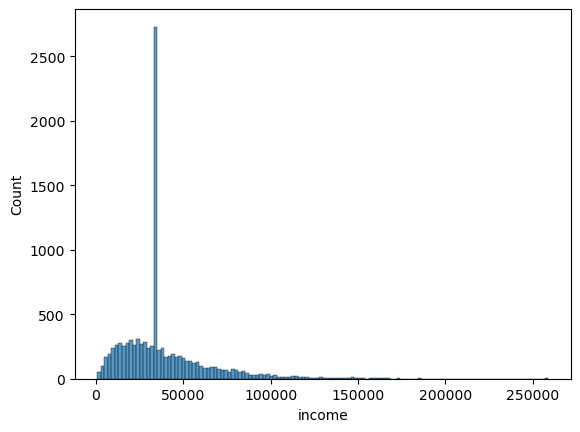

In [249]:
# Check the new distribution
sns.histplot(data=df, x='income');

---

In [250]:
# Variable: internet_service
df['internet_service'].isnull().sum()

2129

In [251]:
df['internet_service'] = df['internet_service'].fillna("None")

In [252]:
df['internet_service'].value_counts()

internet_service
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

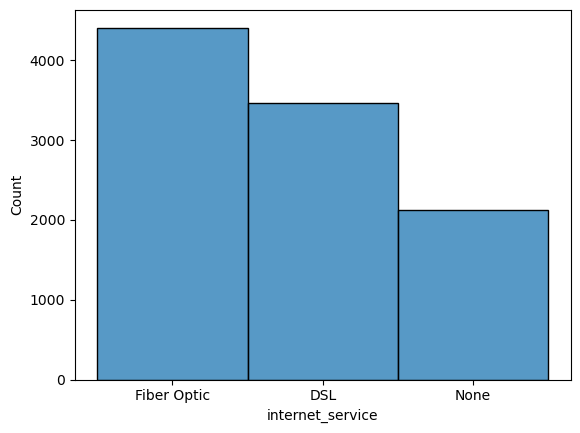

In [253]:
sns.histplot(data=df, x='internet_service');

In [254]:
df['internet_service'].isnull().sum()

0

---

In [255]:
# Variable: techie
df['techie'].isnull().sum()

2477

In [256]:
# Variable: phone_service
df['phone_service'].isnull().sum()

1026

In [257]:
# Variable: tech_support
df['tech_support'].isnull().sum()

991

In [258]:
# Change null values to no
# Variable: techie, phone_service, tech_support
null_cats = ['techie', 'phone_service', 'tech_support']
df[null_cats] = df[null_cats].fillna("no")
df[null_cats]

,techie,phone_service,tech_support
1,No,Yes,No
2,Yes,Yes,No
3,Yes,Yes,No
4,Yes,Yes,No
5,No,No,Yes
...,...,...,...
9996,no,no,No
9997,no,no,No
9998,No,Yes,No
9999,No,No,Yes


In [259]:
# Variable: techie
df['techie'].isnull().sum()

0

In [260]:
# Variable: phone_service
df['phone_service'].isnull().sum()

0

In [261]:
# Variable: tech_support
df['tech_support'].isnull().sum()

0

---

In [262]:
# Variable: tenure
df['tenure'].describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: tenure, dtype: float64

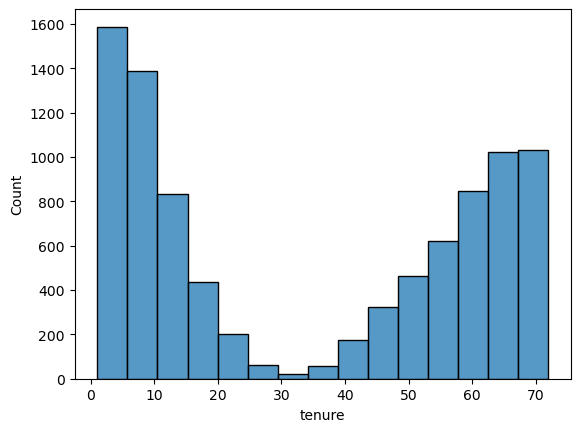

In [263]:
# Re-check the original distribution
sns.histplot(data=df, x='tenure');

In [264]:
print(df['tenure'].mode())

# Fill null values with 0 due to failure of system to report tenure or customer churning
df['tenure'] = df['tenure'].fillna(df['tenure'].mode()[0])

0    55.44991
1    62.86571
2    66.66853
3    69.50480
Name: tenure, dtype: float64


In [265]:
# Check for number of null values
df['tenure'].isnull().sum()

0

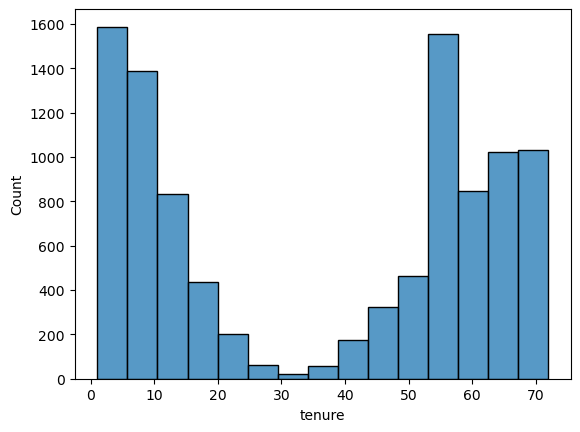

In [266]:
# check the new distribution
sns.histplot(data=df, x='tenure');

---

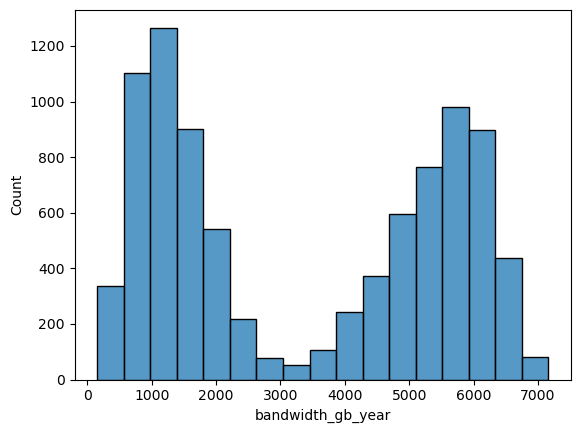

In [267]:
# Variable: bandwidth_gb_year
# Check the original distribution
sns.histplot(data=df, x='bandwidth_gb_year');

In [268]:
# Get central values for bandwidth_gb_year
print(df['bandwidth_gb_year'].mode())

# Fill null values with 0 due to failure of system to report bandwidth_gb_year or due to customer churning
df['bandwidth_gb_year'] = df['bandwidth_gb_year'].fillna(df['bandwidth_gb_year'].mode()[0])

0    5228.370
1    5626.094
2    5932.680
3    6081.603
4    6261.419
5    6294.845
6    6417.345
Name: bandwidth_gb_year, dtype: float64


In [269]:
# Check for number of null values
df['bandwidth_gb_year'].isnull().sum()

0

In [270]:
# Check the DataFrame to verify there are no remaining missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   city                      10000 non-null  object 
 4   state                     10000 non-null  object 
 5   county                    10000 non-null  object 
 6   zip                       10000 non-null  int64  
 7   lat                       10000 non-null  float64
 8   lng                       10000 non-null  float64
 9   population                10000 non-null  int64  
 10  area_type                 10000 non-null  object 
 11  time_zone                 10000 non-null  object 
 12  job                       10000 non-null  object 
 13  children                  10000 non-null  float64
 14  age        

### Treat Outliers

In [271]:
# Variable: population
df['population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: population, dtype: float64

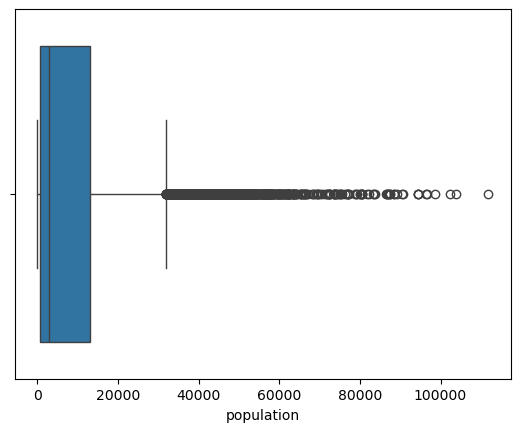

In [272]:
# Use box plot to view outliers
sns.boxplot(data=df, x='population');

In [273]:
# Find the 90th percentile of the population to remove extreme outliers
percentile_90 = np.percentile(df['population'], 90)
percentile_90

30558.000000000007

In [274]:
# Impute the value of the 90th percentile for anything currently over that value
df['population'] = df['population'].apply(lambda x: percentile_90 if x > percentile_90 else x)

In [275]:
df['population'].describe()

count    10000.000000
mean      8308.263800
std      10348.087976
min          0.000000
25%        738.000000
50%       2910.500000
75%      13168.000000
max      30558.000000
Name: population, dtype: float64

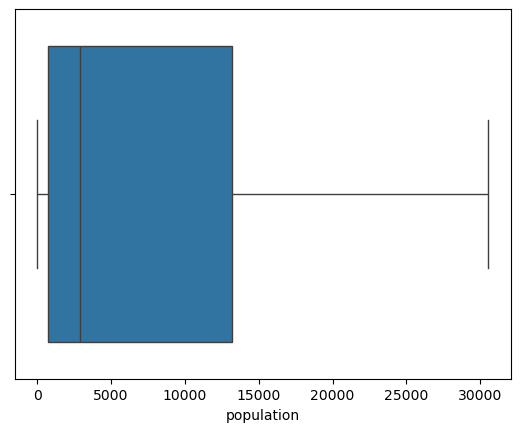

In [276]:
# Use box plot to view new distribution
sns.boxplot(data=df, x='population');

### Change Data Types

In [277]:
# Check current status of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   city                      10000 non-null  object 
 4   state                     10000 non-null  object 
 5   county                    10000 non-null  object 
 6   zip                       10000 non-null  int64  
 7   lat                       10000 non-null  float64
 8   lng                       10000 non-null  float64
 9   population                10000 non-null  float64
 10  area_type                 10000 non-null  object 
 11  time_zone                 10000 non-null  object 
 12  job                       10000 non-null  object 
 13  children                  10000 non-null  float64
 14  age        

In [278]:
# Create mask of columns to re-express as string data types
to_string = ['zip', 'lat', 'lng']

# Re-express as string data types
# (McKinney, 2022), (pandas, 2024)
df[to_string] = df[to_string].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   city                      10000 non-null  object 
 4   state                     10000 non-null  object 
 5   county                    10000 non-null  object 
 6   zip                       10000 non-null  object 
 7   lat                       10000 non-null  object 
 8   lng                       10000 non-null  object 
 9   population                10000 non-null  float64
 10  area_type                 10000 non-null  object 
 11  time_zone                 10000 non-null  object 
 12  job                       10000 non-null  object 
 13  children                  10000 non-null  float64
 14  age        

In [279]:
# Add leading 0's to zip codes so that all are 5 digits long
# (pandas, 2024)
df['zip'] = df['zip'].str.zfill(5)

In [280]:
# Verify that in string form, the minimum `zip` value has proceeding 0s as placeholders
df['zip'].min()

'00601'

In [281]:
df['children'] = df['children'].astype('int')
df['children'].info()

<class 'pandas.core.series.Series'>
Index: 10000 entries, 1 to 10000
Series name: children
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 414.3 KB


In [282]:
# Convert the following variables to nominal categories
# (Pandas documentation - Categorical Data)
nominal_categories = ['area_type', 'time_zone', 
                      'job', 'employment',
                      'marital', 'gender', 'internet_service',
                      'contract', 'payment_method', 
                      'education'] # Education could be ordinal but there is no reason to believe so for this dataset
df[nominal_categories] = df[nominal_categories].astype('category')

# Check for conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_order                10000 non-null  int64   
 1   customer_id               10000 non-null  object  
 2   interaction               10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  float64 
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  category
 13  children                  10000 non-null  int64   


In [283]:
df['churn'].value_counts()

churn
No     7350
Yes    2650
Name: count, dtype: int64

In [284]:
# Create a gender mapping dictionary to replace 'Male' with 'M',
# 'Female' with 'F', and 'Prefer not to answer' with 'NA'
gender_mapping_dict = {'Male': 'M',
                      'Female': 'F',
                      'Prefer not to answer': 'NA'}

# Apply mapping dictionary to Gender values
df['gender'] = df['gender'].cat.rename_categories(gender_mapping_dict)
                                    
# Check for values
df['gender'].value_counts()

gender
F     5025
M     4744
NA     231
Name: count, dtype: int64

In [285]:
# Create a mapping dictionary to replace 'No' values with 0 and 'Yes' values with 1
bool_mapping_dict = {'No': False, 'Yes': True}

# Create a list of variables to convert to Booleans
bool_variables = ['churn', 'techie', 'portable_modem', 'tablet',  
                  'phone_service', 'multiple_services', 'online_security', 'online_backup',
                  'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                  'paperless_billing']

# Apply mapping dictionary to object types that should be Booleans
df[bool_variables] = df[bool_variables].replace(bool_mapping_dict)

In [286]:
df[bool_variables].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   churn              10000 non-null  object
 1   techie             10000 non-null  object
 2   portable_modem     10000 non-null  object
 3   tablet             10000 non-null  object
 4   phone_service      10000 non-null  object
 5   multiple_services  10000 non-null  object
 6   online_security    10000 non-null  object
 7   online_backup      10000 non-null  object
 8   device_protection  10000 non-null  object
 9   tech_support       10000 non-null  object
 10  streaming_tv       10000 non-null  object
 11  streaming_movies   10000 non-null  object
 12  paperless_billing  10000 non-null  object
dtypes: object(13)
memory usage: 1.3+ MB


In [287]:
# Convert the bool_variables list to Boolean categories
df[bool_variables] = df[bool_variables].astype('bool')

# Check for conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_order                10000 non-null  int64   
 1   customer_id               10000 non-null  object  
 2   interaction               10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  float64 
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  category
 13  children                  10000 non-null  int64   


In [288]:
# Convert survey questions to Ordinal Categories
# Create a survey response structure
# (Boeye, 2024), (pandas, 2024)
survey_responses = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)

# Create a mask of the survey questions
survey_questions = ['timely_response', 'timely_fixes', 
                    'timely_replacements', 'reliability', 
                    'service_options', 'respectful_response', 
                    'courteous_exchange', 'active_listening']

# Convert the survey responses to ordinal categories
df[survey_questions] = df[survey_questions].map(str)
df[survey_questions] = df[survey_questions].astype(survey_responses)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_order                10000 non-null  int64   
 1   customer_id               10000 non-null  object  
 2   interaction               10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  float64 
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  category
 13  children                  10000 non-null  int64   


## D5. Cleaned Data

See attached CSV file for output

In [289]:
# Save cleaned DataFrame as CSV, removing imposed index
df.to_csv('churn_data_cleaned_Murdock_Shanay.csv', index=False)

## D6. Summary of Limitations

A limitation is that the collapse of time zones is being done in July in Eastern Daylight Time and does not account for changes in the time zones due to Daylight Savings Time depending on the time of year. This would typically be automated using the datetime data type but would also feature more corresponding date data.

The dataset was missing values from 9 columns, ranging between about 900 to 2,500 missing values for each of those variables. At a dataset of 10,000 rows, this isn’t unacceptable. Still, it would be helpful to know if those values are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR), as that might indicate why the data is missing. Some of the values are self-reported values through customer sign-up information, and depending on the input (paper versus web form), these could be made as required inputs in the future.

Imputation was decided based on a column’s distribution. Still, a limitation is that as this is a solo project using fictionalized data, there isn’t someone with institutional knowledge to try to glean further insights.

Only one outlier was seen as extreme enough to change. The population data seemed very high for anything to do with a 1-mile radius. The challenge was deciding where to place an arbitrary cap at a percentile and whether to impute the cap or median data. I chose the cap to keep the data points in line with their originals, even though it created a large spike at the end of the distribution when seen in a histogram.

I chose not to drop any outliers to preserve as much data as possible for further analysis.

I also made judgment calls on re-expressing some of the columns as categories. For instance, education and marital data could be changed to nominal or ordinal data, depending on how the data is used. At this time, I chose to leave them as nominal categories.

## D7. Impact of Limitations

While the dataset is now fully complete (there are no missing values), the imputations of data were best guesses. This will introduce some bias into the dataset as we cannot turn to the data owner and ask why the data is missing, if it can be retrieved, or the implications of not having it.

There are new spikes in the distribution, which another analyst would see if EDA is performed. While we can hope that they’d understand imputation happened in certain distributions (e.g., age, population), that’s not a given, and documentation would need to be added to ensure understanding for proper collaboration.

The imputations also have downstream consequences, especially in the demographic data. Nearly 25% of the customers now appear to be age 53, and rather than a tail of high-population cities, there is a giant spike at the very end, which can be misleading.

## E1. Principal Component Analysis

In [291]:
# Create a mask of continuous variables 
# * (omit categorical variables expressed as numbers)
# (Course resources. 2024)
list_continuous_vars = [
		'population',
		'children',
		'age',
		'income',
		'outage_sec_per_week',
		'email',
		'contacts',
		'yearly_equipment_failure',
		'tenure',
		'monthly_charge',
		'bandwidth_gb_year'
]

# Create a DataFrame filtering for the continuous variables for PCA
df_pca = df[list_continuous_vars]

# Normalize the data to compensate for the different measurement units/scales
# (Course resources, 2024)
df_pca_normalized = (df_pca - df_pca.mean()) / df_pca.std()

# Find the PCA output (Component Extraction)
# (Course resources, 2024)
pca = PCA(n_components = df_pca.shape[1])

# Fit the data
pca.fit(df_pca_normalized)

PCA(n_components=11)

In [292]:
# Print out the component loadings (correlation coefficients of each Principal Component)
# (Course resources, 2024)
pca_loading_matrix = pd.DataFrame(pca.components_.T,
            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
                       index=df_pca.columns)
pca_loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
population,-0.012069,-0.038791,-0.408759,-0.263057,0.103818,0.609370,-0.472860,-0.099862,-0.382387,0.012982,-0.000087
children,-0.005935,0.045505,0.525593,-0.190648,0.092330,0.319617,0.460790,0.266213,-0.539488,0.016320,-0.010454
age,-0.015123,-0.049628,-0.295497,0.597645,-0.080342,0.132906,0.432445,-0.483580,-0.304100,0.122072,0.021330
income,0.003922,-0.001858,0.235689,0.150787,0.830630,0.237079,-0.007937,-0.257979,0.322523,-0.070023,0.001254
outage_sec_per_week,0.024310,0.706093,0.011923,0.000102,0.023827,0.030933,-0.059630,0.006128,0.066482,0.700816,0.004345
email,-0.019454,0.059090,-0.361230,-0.470787,-0.087297,0.299741,0.580268,-0.049144,0.451971,-0.055979,-0.000607
contacts,0.003974,-0.010947,-0.406820,0.383094,0.256969,0.073633,0.104165,0.777490,0.027749,0.005219,-0.002695
yearly_equipment_failure,0.014977,0.060922,0.329127,0.378157,-0.457733,0.591062,-0.159788,0.091074,0.368498,-0.127409,-0.003479
tenure,0.704847,-0.060100,-0.013986,-0.003207,-0.001424,0.008426,0.015714,-0.015352,0.000206,0.041840,-0.705030
monthly_charge,0.044737,0.695966,-0.095504,0.053104,0.023480,-0.083432,0.002680,-0.057222,-0.144600,-0.683481,-0.053291


Utilize the Kaiser Rule (Kaiser Criterion) to retain Principal Components retaining PCs with eigenvalues greater than 1 (Course resources, 2024).

In [293]:
# Utilize the Kaiser Rule (Kaiser Criterion) to retain Principal
# * Components retaining PCs with eigenvalues greater than 1
# (Course resources, 2024)

# Get eigenvalues
covar_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covar_matrix, eigenvector)) for eigenvector in pca.components_]
eigenvalues

[1.840754740261099,
 1.131800559161275,
 1.0497393350495845,
 1.0199565029404072,
 1.004038272845397,
 0.9935346235938224,
 0.9903876196385228,
 0.981175912510785,
 0.9631006122109254,
 0.8654206136503254,
 0.15899120813797407]

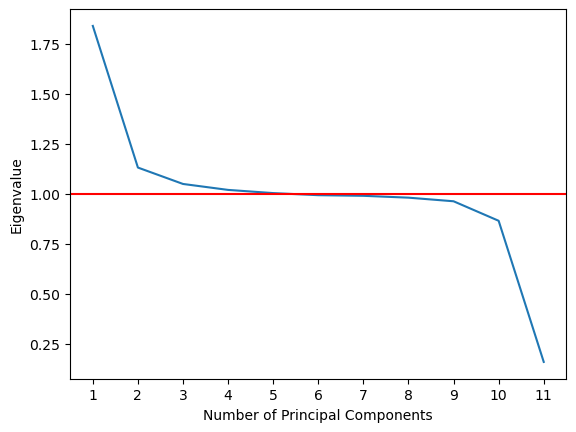

In [312]:
# Generate a scree plot indicating the number of Principal Components
PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, eigenvalues)
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.xticks(range(1,12,1))
plt.axhline(y=1, color="red")
plt.show()

`PC1`, `PC2`, `PC3`, and `PC4` meet the Kaiser Criteria.

## E2. Criteria Used in PCA

`PC1`, `PC2`, `PC3`, and `PC4` meet the Kaiser Criteria.

The first four Principal Components meet or exceed the criteria of having an eigenvalue of 1.0 or more. The elbow of the scree plot also levels off after the 4th component. Realistically, based on how close `PC4` is to 1.0, it only just meets the minimum criteria so in a professional setting, I would confer with a team member or leader to determine if all 4 should be kept or if only the first 3 should be kept until having a deeper understanding of the data.

## E3. Benefits of Using PCA

While it is generally agreed that having too much data is better than the alternative of having too little data, the amount of data can become cumbersome, and it can be harder to derive insight from the raw data or know what variables to compare for trends and insights.

With large datasets comes enormous complexity. Principal Component Analysis is one unsupervised learning technique for dimensionality reduction. The process allows us to break the dataset down into smaller groupings of related continuous variables (and reducing the amount of redundant data) while dismissing the groupings that have less impact or insight on any patterns that can be found (Dimensionality Reduction in Python, DataCamp, 2024).

Principal Component Analysis also provides thresholds for understanding how well each principal component represents the data through reduction. This threshold allows the user to understand what principal components are worth keeping for insight.

This process is generally beneficial for datasets with many variables (dimensions). Still, as the Churn dataset is mainly made up of qualitative or categorical variables, it is worth noting that only about 20% of the dataset's dimensions can be used in the PCA model, with only 11 dimensions being continuous data types.
